<img src="https://aithority.com/wp-content/uploads/2021/03/scaler.jpg" alt="Scaler Academy" style="width:1500px; height:1500px;">


<font size="7" color="blue"><b>Analyzed By:</b>
<br>
<font size="6">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Shama Bansal</font>


#<font color='blue'> ***Problem Statement*** <color/>

**Background**:  
Scaler, an online tech-versity, is renowned for offering intensive courses in Computer Science and Data Science through live classes delivered by industry experts. With a meticulously structured curriculum, Scaler enhances the technical skills of professionals, providing exposure to cutting-edge technologies. As Scaler continues to expand, understanding the diverse professional backgrounds of its learners is crucial for customizing educational offerings, improving retention, and enhancing satisfaction.

**Business Challenge**:  
The key challenge for Scaler lies in identifying patterns within the diverse learner database, especially in terms of current job roles, companies, and professional experiences. By uncovering these patterns, Scaler aims to cluster learners with similar profiles to:  
- Deliver a personalized and relevant learning experience.  
- Tailor content recommendations and mentorship programs.  
- Profile the best companies and job positions for their alumni.  

Key Points:<br>
1) **Objective**:  
The goal is to analyze learner data, perform clustering, and derive actionable insights to enhance course offerings and learner experiences. Specifically:  
  - **Cluster learners** based on job profiles, companies, and additional relevant features.  
  - Evaluate the **coherence and interpretability of the clusters** to ensure meaningful segmentation.  
  - Provide **insights** that can inform content tailoring, separate learning groups, mentorship allocation, and job placement support.    
  - The ultimate goal is to extract meaningful insights, such as identifying trends, common characteristics, or preferences among learners in similar roles or companies.

2) **What You're Profiling**:
   -  **Job profiles**: Roles like Software Engineer, Data Scientist, Product Manager, etc.
   - **Companies**: Organizations learners are associated with, such as top tech companies, startups, etc.
   - **Other features**: Possibly data about salary, years of experience, location, skills, educational background, or performance.

3) **Why Clustering Learners?**
   - Clustering learners into groups with similar characteristics helps uncover patterns like:
   - Common job roles learners pursue.
   - Key attributes of learners at top companies.
   - Segments of learners needing additional training to land high-demand roles.
   - These insights can guide Scaler in improving its programs or targeting specific learners for career enhancement.

4) **Outcome**:
   - Clusters provide actionable insights into which companies and roles learners are most successful in.
   - Scaler can use these insights to better market their offerings, recommend career paths, or focus training on high-value roles.


**Scope of Work**:  
- **Data Understanding and Preprocessing**: Conduct exploratory data analysis (EDA), handle missing values, and prepare data for clustering.  
- **Feature Engineering**: Extract meaningful features from the dataset to enhance clustering performance.  
- **Clustering Techniques**: Apply unsupervised learning methods such as K-means, Hierarchical Clustering, or other relevant algorithms.  
- **Cluster Evaluation**: Assess cluster quality using metrics like silhouette score, Davies-Bouldin index, or domain-specific coherence.  
- **Actionable Insights**: Translate cluster characteristics into strategic recommendations for personalized learning paths, targeted mentorship programs, and job profiling.

**Learning Opportunity for Participants**:  
- Gain hands-on experience with **unsupervised learning** techniques to solve real-world challenges.  
- Develop expertise in **EDA**, feature engineering, and clustering evaluation.  
- Understand how data-driven decision-making can enhance **business strategies** in the EdTech domain.  
- Collaborate on translating raw data into insights that can shape organizational outcomes.  



## ***Data Dictionary*** <br>

**Unnamed 0** - Index of the dataset<br>
**Email_hash** - Anonymised Personal Identifiable Information (PII)<br>
**Company_hash** - This represents an anonymized identifier for the company, which is the current employer of the learner.<br>
**orgyear** - Employment start date<br>
**CTC** - Current CTC<br>
**Job_position** - Job profile in the company<br>
**CTC_updated_year** - Year in which CTC got updated (Yearly increments, Promotions)
<br>


# <FONT COLOR='blue'>*Importing Necessary Modules*

In [7]:
!pip install pyspellchecker

In [8]:
from google.colab import files
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from spellchecker import SpellChecker

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import KNNImputer

from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Uploading Dataset
# uploaded=files.upload()

In [10]:
# Reading Dataset
# df = pd.read_csv(io.BytesIO(uploaded['scaler_clustering.csv']))
# df.head()

In [11]:
# Reading Dataset
df=pd.read_csv('scaler_clustering.csv')
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [12]:
# Dataset Observation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


- Raw dataset contains 205843 rows nd 7 columns
- 2 columns **ctc** and **unnamed:0** have int datatype, 2 have- **orgyear** and **ctc_updated_year** float dtype and 3 object dtypes- **company_hash**,**email_hash** and **job_position**

In [13]:
df.nunique()

,0
Unnamed: 0,205843
company_hash,37299
email_hash,153443
orgyear,77
ctc,3360
job_position,1016
ctc_updated_year,7


# ***Data Preprocessing***

unnamed:0 has all unique values means working as index column only, so removing it

In [14]:
# Dropping Unnecessary column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [15]:
# Checking Duplicate Values
df.duplicated().sum()

34

In [16]:
df[df.duplicated()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
97138,wtqtzwt xzw,bb8e4b09544daf1bfc8c7bb9a9ae1fee35490cf3f321b8...,2014.0,1000000,FullStack Engineer,2019.0
98085,2020,6ad3e6ab27462c2c7428fa5d51405933335341d4d969b5...,2020.0,720000,NaN,2019.0
102600,voxvz uvxzno,c7fac937a34f7ae432ff1d77466eb7ea6cf25dfd5ebcca...,2020.0,1280000,NaN,2019.0
109324,wgbwvon mhoxztoo,0442a51ef5080d7d40721c007131a1d5bdeabae2c1b153...,2016.0,700000,NaN,2019.0
110833,zgn vuurxwvmrt vwwghzn,8aad76cb5766c6b24c8eebfeb891cb548420690d0030a0...,2019.0,500000,NaN,2021.0
111354,uyxrxuo xzzgcvnxgz wvbuho,704d69965035d1c341b06fc5d83bf1b714f1625c0cf271...,2017.0,850000,iOS Engineer,2019.0
111521,aqggb ntwyzgrgsj,df81dac132d66a42a0c71a4799e1040731738e542c81ff...,2017.0,1270000,FullStack Engineer,2019.0
115241,rgfto wgbuvzxto xzw,ea363e930dabe0fbb63438e07775af3cb3b32639947c47...,2017.0,1100000,Backend Engineer,2019.0
117246,xatbxv,f451ceee50b1bfa3dc749c6aa8634ab3851a4ab961b003...,2019.0,640000,NaN,2019.0
117549,exzdtqv,e7df851527dd6f8ec95d5e13d9fb2a7255380245b808e3...,2020.0,1500000,NaN,2020.0


In [17]:
df.iloc[109324,1]

'0442a51ef5080d7d40721c007131a1d5bdeabae2c1b1537b5d472a937b6ab5cb'

In [18]:
df[df['email_hash']=='71aa46088d2a416970bb7620dbed05b7f0bfcebf9d349360bb2404ae6cee0bf6']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
80494,vxqntr drvmo,71aa46088d2a416970bb7620dbed05b7f0bfcebf9d3493...,2016.0,2500000,Backend Engineer,2021.0
109328,vxqntr,71aa46088d2a416970bb7620dbed05b7f0bfcebf9d3493...,2016.0,1800000,NaN,2020.0
117390,vxqntr drvmo,71aa46088d2a416970bb7620dbed05b7f0bfcebf9d3493...,2016.0,2500000,NaN,2021.0


The rows are duplicated for some users, even sometimes having NaN values in one of the rows.Drpping those duplicate rows.

In [19]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [20]:
# @title *Checking Missing Values*
df.isna().sum()

,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52548
ctc_updated_year,0


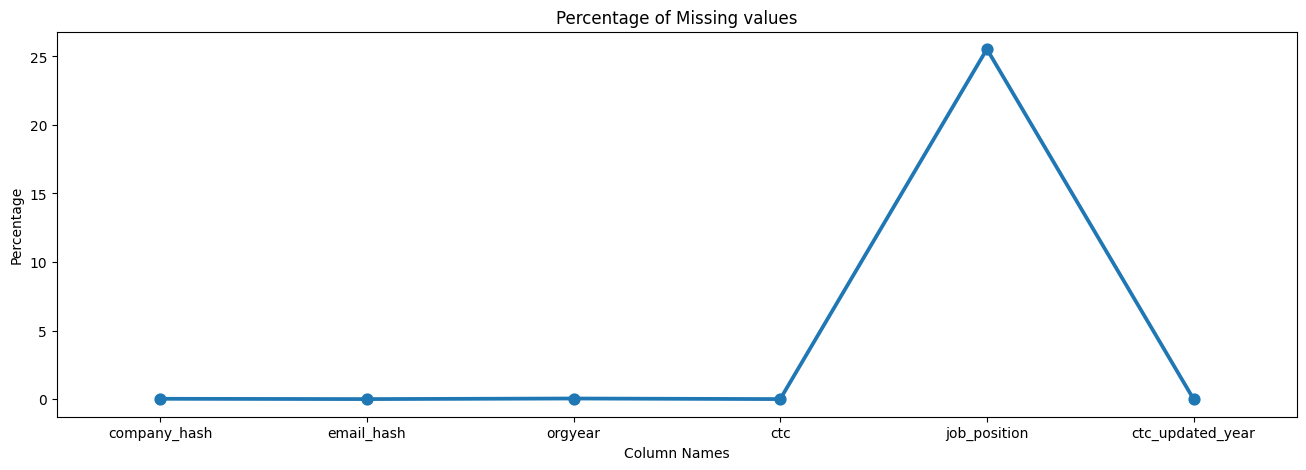

In [21]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)          # column name=0
plt.xticks(fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.xlabel("Column Names")
plt.show()

We can see almost 25% data from `job_position` column is missing.

In [22]:
df.email_hash.value_counts().head(10)

,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065,8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551,8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0,8


In [23]:
df[df['email_hash']=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


In [24]:
df.drop(columns=['job_position']).duplicated().sum()

38948

As we can see if we remove the Job_positions, there will be **39948** duplicate instances. So there is a possibility that a person can work for many roles which are integrated into each other but instead of nesting them, these are shown as different rows.
A learner changing position 10 times in same company and in 2 years is quite illogical.

In [25]:
df['job_position'].value_counts().head(10)

,count
job_position,
Backend Engineer,43546
FullStack Engineer,24711
Other,18071
Frontend Engineer,10417
Engineering Leadership,6870
QA Engineer,6587
Data Scientist,5367
Android Engineer,5356
SDET,4967


In [26]:
df[df['job_position'].str.contains('Software',case=False, na=False)]['job_position'].value_counts()

,count
job_position,
Senior Software Engineer,55
Software Engineer (Backend),42
Software Engineer 2,22
Associate Software Engineer,18
Software Engineer,17
...,...
Senior Software Development Engineer (Backend),1
Software Enginnering Specialist,1
Senior Engineer Software,1


There are different job_positions like SDE1, SDE2, software engineer, senior software engineer, software engineer 2 etc, which can be a single role, so lets integrate them into one. But before that lets try to fill null values in this column using users mode value for job_position.

In [27]:
df['job_position'].isna().sum()

52548

In [28]:
# @title *Treating Missing Values*
# for job_position column
def fill_with_mode(group):
    mode_job = group['job_position'].mode()
    return group['job_position'].fillna(mode_job[0] if not mode_job.empty else 'Unknown')

df['job_position']=df.groupby('email_hash').apply(fill_with_mode).reset_index(level=0, drop=True)

In [29]:
df['job_position'].isna().sum()

0

# <font color='blue'> *Univariate Analysis*

### *JOB_POSITION*

In [127]:
df['job_position'].value_counts()

,count
job_position,
backend engineer,45575
fullstack engineer,26818
unknown,21155
other,18562
frontend engineer,10716
...,...
talent acquisition sspecialist,1
asset management coordinator,1
leisure manager,1


In [31]:
# Cleaning Data
import re

def clear_feat(col_data):
    new_data=re.sub('[^A-Za-z ]+', '', col_data)
    return new_data

In [32]:
df['job_position']=df['job_position'].apply(clear_feat)
df['job_position']=df['job_position'].str.strip().str.lower()
df['job_position']

,job_position
0,other
1,fullstack engineer
2,backend engineer
3,backend engineer
4,fullstack engineer
...,...
205838,unknown
205839,unknown
205840,unknown
205841,unknown


In [33]:
# checking duplicate values after cleaning job_position and filling nan values
df.duplicated().sum()

26821

In [34]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [35]:
df.shape

(178988, 6)

In [36]:
df['job_position'].nunique()

856

In [37]:
df['job_position'].value_counts().iloc[:235]

,count
job_position,
backend engineer,45575
fullstack engineer,26812
unknown,21155
other,18562
frontend engineer,10715
...,...
mainframe developer,2
research analyst,2
insurance agent,1


We can see there are only 232 job_positions which have atleast 2 users, remaining 624 roles are those for which only 1 learner is there, which shows that learners belonging to these roles are negligible or kind of outliers.
Lets see if these roles have any particular features.

In [38]:
spell = SpellChecker()

misspelled = spell.unknown(list(df['job_position'].values)[:100])
dicter={}
for word in misspelled:
    dicter[word]=spell.correction(word)

print(dicter)



{'sdet': 'set', 'data analyst': None, 'data scientist': None, 'qa engineer': None, 'engineering leadership': None, 'ios engineer': None, 'frontend engineer': None, 'security leadership': None, 'research engineers': None, 'fullstack engineer': None, 'engineering intern': None, 'support engineer': None, 'android engineer': None, 'backend engineer': None}


spell checker not working fine(converting sdet to set), so correcting some spellings manually

In [39]:
replace_dict = {'r  d engineer':'rd engineer',
                'softwear':'software',
                'sw':'software',
                'sofware':'software',
                'mgr':'manager',
                'front end':'frontend',
                'back end':'backend',
                'devlopment':'development',
                'full stack':'fullstack',
                'reasearch':'research',
                'credit':'credits',
                'it ':'IT  ',
                'eingineer':'engineer',
                'analayst':'analyst',
                'enginner':'engineer',
                'devloper':'developer',
                'unempolyed':'unemployed',
                'maricketing':'marketing',
                'engineet':'engineer'
                }

for old_value, new_value in replace_dict.items():
    df['job_position'] = df['job_position'].str.replace(old_value, new_value)

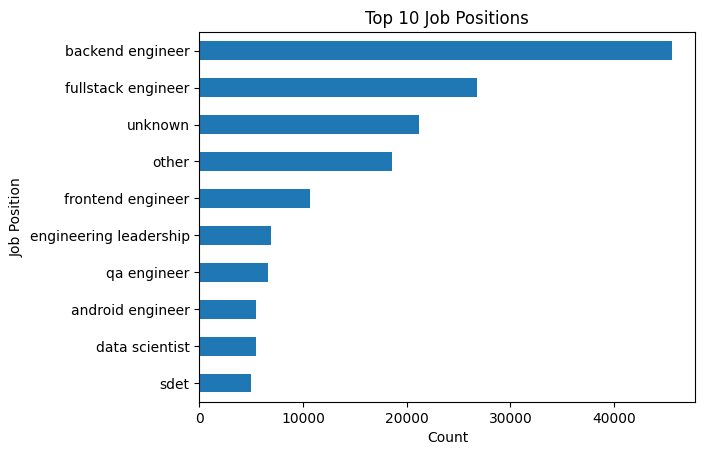

In [40]:
df['job_position'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Job Positions')
plt.xlabel('Count')
plt.ylabel('Job Position')
plt.show()

Backend engineers dominate with 45,575 counts, followed by fullstack engineers at 26,818, reflecting industry demand for backend and versatile development skills. A significant "unknown" category (21,155) suggests data refinement is needed but due to less knowledge about missing values, keeping it as it is.

In [41]:
# binning job_positions into categories
def categorize_job(title):
    if 'intern' in title or 'trainee' in title:
        return 'Internship'
    elif any(keyword in title for keyword in['ceo','founder','entrepreneur','cto']):
        return 'Top Officials'
    elif 'analyst' in title or 'analytics' in title:
        return 'Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif any(keyword in title for keyword in ['research','rd ',' rd','scientist']):
        return 'Research'
    elif 'data' in title and 'engineer' in title:
        return 'Data Engineer'
    elif any(keyword in title for keyword in ['facilitator','teacher','teaching','lecturer','pgt','professor','faculty']):
        return 'Teaching'
    elif any(keyword in title for keyword in ['test','qa','qc','automation']):
        return 'Quality Assurance and Testing'
    elif any(keyword in title for keyword in ['software','sde','developer','programmer']):
        return 'Software'
    elif any(keyword in title for keyword in ['manager','leader','head','director','lead','executive','president']):
        return 'Management'
    elif any(keyword in title for keyword in ['mobile','ios','flutter','android']):
        return 'Mobile Engineer'
    elif any(keyword in title for keyword in ['machine learning', 'ml', 'm l','aiml','ai']):
        return 'ML Engineer'
    elif any(keyword in title for keyword in['learning','no job','student','fresher', 'graduate', 'not employed','unemployed']):
        return 'Fresher'
    elif 'frontend' in title or 'web' in title:
        return 'Frontend Engineer'
    elif any(keyword in title for keyword in ['backend','application','integration']):
        return 'Backend Engineer'
    elif any(keyword in title for keyword in ['support','technical','escalation','services','release','pop', 'risk investigator','power plant','fibre','highway','room','mechanical']):
        return 'Support & Maintenance Engineer'
    elif any(keyword in title for keyword in['cyber','IT','iaas','cloud','techops','server','ware','devops','system','performance','radio']):
        return 'IT and Cyber Security'
    elif any(keyword in title for keyword in['product','solution','project','fullstack','implementation','development','platform','design','engineer']):
        return 'Product Development'
    elif any(keyword in title for keyword in['database administrator','oracle dba','linux administrator','network administrator']):
        return 'Database Administration'
    elif any(keyword in title for keyword in ['talent','human','chief people','consul']):
        return 'Human Resources'
    elif any(keyword in title for keyword in ['administrat', 'associate','data','technology']):
        return 'Operations/Administrative Roles'
    elif 'unknown' in title:
        return 'Unknown'
    else:
      return 'Non Technical Roles'

df['job_category'] = df['job_position'].apply(categorize_job)
df['job_category'].value_counts()

,count
job_category,
Backend Engineer,46916
Product Development,28255
Unknown,21155
Non Technical Roles,19318
Frontend Engineer,10725
Management,9190
Mobile Engineer,8262
Quality Assurance and Testing,6708
Software,5728


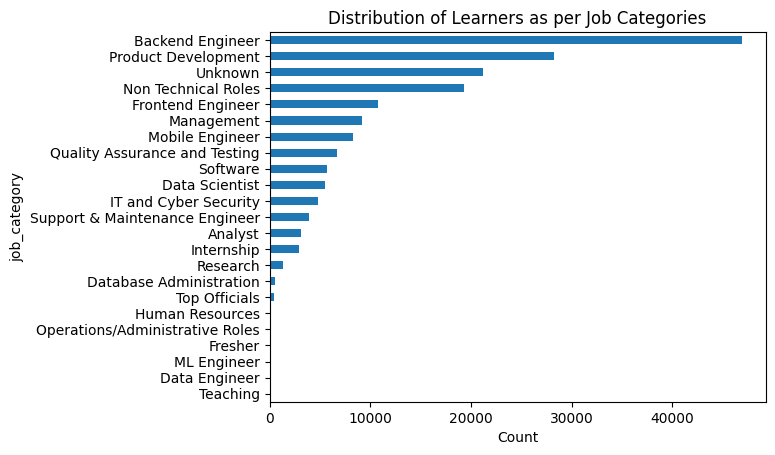

In [42]:
df['job_category'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Distribution of Learners as per Job Categories')
plt.xlabel('Count')
plt.show()

1. **Backend Engineer Leads**: The "Backend Engineer" category remains the most prominent with **46,916** learners, reflecting its critical role in product architecture.  

2. **Product Development in High Demand**: "Product Development" emerges as the second-largest category with **28,255** learners, showcasing its importance in creating innovative solutions.

3. **Significant Unknown Data**: The "Unknown" category (**21,155**) indicates a need for improved job role classification or data quality.

4. **Non-Technical Roles are Substantial**: With **19,318** learners, non-technical roles form a notable segment, highlighting Scaler's appeal beyond technical domains.

5. **Data Science Shows Potential**: The "Data Scientist" category has **5,478** learners, underscoring growing interest in this high-demand field.

6. **Specialized Roles Are Niche**: Categories like "ML Engineer" (**29**) and "Data Engineer" (**27**) indicate niche interest areas with scope for targeted growth.

In [43]:
# checking roles in non technical category
df[df['job_category']=='Non Technical Roles']['job_position'].value_counts().head(15)

,count
job_position,
other,18562
non coder,601
,9
mts,9
na,5
no,4
ase,3
sales,3
driver,2


In [44]:
df[df.drop(['job_position'],axis=1).duplicated()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,job_category
4718,bxwqgogen,dceb289be0e23a77c5a02d193997abc3109e8805101777...,2011.0,6900000,backend architect,2019.0,Backend Engineer
5110,avzopt xn,3d6fb1d08f0e6129d97089626f33ca3747a9d495291723...,2005.0,4400000,architect team lead,2021.0,Management
9854,vwwgrxnt ogenfvqt xzaxv ucn rna,e384a1c1bce518ec3962ed3da2b626a007edf66cce2458...,2011.0,2100000,backend engineer,2020.0,Backend Engineer
10014,lvjutt xzonxnhnt ge xzegqbvnxgz ntwyzgrgsjzgxav,e83088332191a14dfaa9131eeafb4f596809c34b8520c2...,2018.0,200000,backend architect,2019.0,Backend Engineer
10397,ovx trtwnqxwvro,7d021961cae2b6eaacce2c09ecaa75320654f8b63ef2c5...,2016.0,860000,product manager,2020.0,Management
...,...,...,...,...,...,...,...
202157,xmb xzaxv uqxcvnt rxbxnta,ea3b6c66270fb97616a8315fe203314a033da841ab4793...,2016.0,1675000,backend architect,2019.0,Backend Engineer
202182,gqvwrt,be83bbdb1a0909062489156ed76be3a9ce815274339a81...,2008.0,2000000,backend architect,2019.0,Backend Engineer
202524,ouqxzsbr,ee5ab46320f580d8b5bf508bb75df74d6cbca13f963cd5...,2011.0,1800000,backend architect,2021.0,Backend Engineer
203432,ytfrtnn uvwpvqa tzntquqxot,a566e153d1fafc0be8d4a28038fd4616d09a97a32ab0c5...,2016.0,200000,non coder,2021.0,Non Technical Roles


 We are not much worried about the change in level of a person but in the domain of the person job profile as a whole so dropping job position column as these are binned into job category.

In [45]:
# Dropping job_position after binning
df_new=df.copy()
df_new.drop(columns=['job_position'],inplace=True)

In [46]:
# dropping duplicates
df_new.drop_duplicates(inplace=True)
print('Shape of Dataset before Dropping Duplicates',df.shape)
print('Shape of Dataset after Dropping Duplicates',df_new.shape)

Shape of Dataset before Dropping Duplicates (178988, 7)
Shape of Dataset after Dropping Duplicates (178579, 6)


### *COMPANY_HASH*

In [47]:
df_new['company_hash'].value_counts().head(10)

,count
company_hash,
nvnv wgzohrnvzwj otqcxwto,6556
xzegojo,4284
vbvkgz,3091
wgszxkvzn,2541
zgn vuurxwvmrt vwwghzn,2457
vwwtznhqt,2294
gqvwrt,2184
fxuqg rxbxnta,2131
bxwqgogen,1959


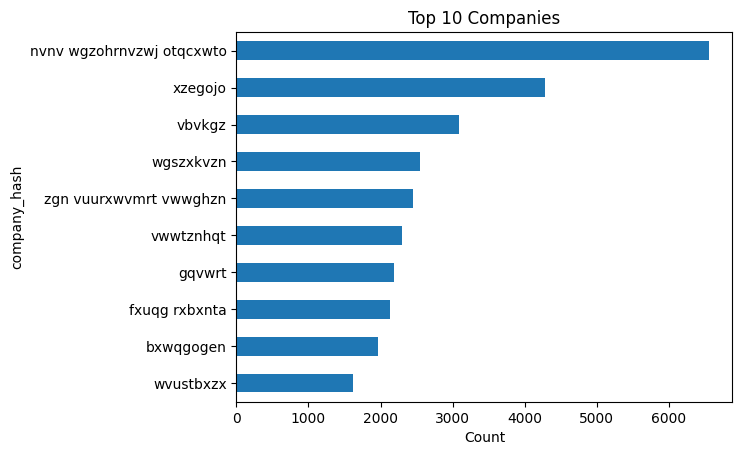

In [48]:
df_new['company_hash'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Companies')
plt.xlabel('Count')
plt.show()

1. **Top Company Leads by a Large Margin**: The company with the hash `nvnv wgzohrnvzwj otqcxwto` has the highest number of learners (**6,556**), indicating it may have a significant workforce interested in upskilling.

2. **Second and Third Companies**: `xzegojo` (**4,284**) and `vbvkgz` (**3,091**) follow, with learner counts significantly lower than the top company, showing a steep drop in representation.

3. **Diverse Representation**: The remaining companies in the top 10 have learner counts ranging from **2,541** to **1,621**, indicating a relatively more even distribution among mid-tier companies.

4. **Focus Areas**: These companies might represent sectors or industries with higher demand for skills offered by Scaler, potentially in technology or software development.

### *COMPANY_HASH*

In [285]:
df_new.email_hash.value_counts().head(10)

,count
email_hash,
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,8
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551,7
f5279f186abfb98a09d85a4467b99863c0bfc91c1147e542d6d23a6a69c9a7be,7
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,7
caf66f38a8e742b7690dceb5b02d81ad8be684cfb6dd29b639a385b83748110b,7


In [286]:
df_new[df_new.email_hash=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,ctc,ctc_updated_year,job_category,joining_year,experience_years
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,720000,2020.00,Product Development,2018.00,3.00
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,720000,2020.00,Support & Maintenance Engineer,2018.00,3.00
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,720000,2020.00,Non Technical Roles,2018.00,3.00
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,720000,2020.00,Analyst,2018.00,3.00
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,660000,2019.00,Non Technical Roles,2018.00,3.00
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,660000,2019.00,Support & Maintenance Engineer,2018.00,3.00
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,660000,2019.00,Product Development,2018.00,3.00
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,660000,2019.00,IT and Cyber Security,2018.00,3.00


In [287]:
df_new.email_hash.value_counts().iloc[20700:20750]

,count
email_hash,
c46c96123d87555dda7f94aa9ffdf0c5650a9d3f3476075593b218aa4f8e881e,2
0a43cdd08bd4b6e9f6d1a00dbe9ff677bac0abcb782726aa597a5e1343210014,2
8991f338487bb642707a2464cf1bb260b3a3647b6ecfd2f1762e334fa5b11770,2
025a0644560a195911fae51d9f80a7484ffca021bb3f0cbdd282ca098723ae55,2
4f329c5cc0576e2869473a71b465aa672c6c96d48b2029fadfa98a6cc67a578e,2
c19b16e81b50b1ed49c6a8249996eb45ac2ffff3a5117ed2b677156b6ed62c18,2
3bd8bf218009d02adca948e70a3a02238e9fc7f31116245368a9eb246faede40,2
c97ca840265241d6c2885363180f5e605d758293135442ef9b682b00d4a4f482,2
a23f9bfdc5939b383188217a9f46f6fd78bd15c596aa659befe60cfcd4e585e8,2


As we can see there are 20,700 + users who have many years data and even 10000 something with 5-9 rows of data.<br>
I am not sure of if the data is collected on date when learner joining the **Scaler** or later or before some time. So, I am assuming it to be on the joining date. So will be taking last ctc updated date and ctc as average to get their values more logical for further analysis.<br>
But lets first fill the missing values before aggregating data.


### *CTC_UPDATED_YEAR*

In [49]:
df_new['ctc_updated_year'].value_counts()

,count
ctc_updated_year,
2019.0,64350
2021.0,47091
2020.0,44619
2017.0,7461
2018.0,6727
2016.0,5438
2015.0,2893


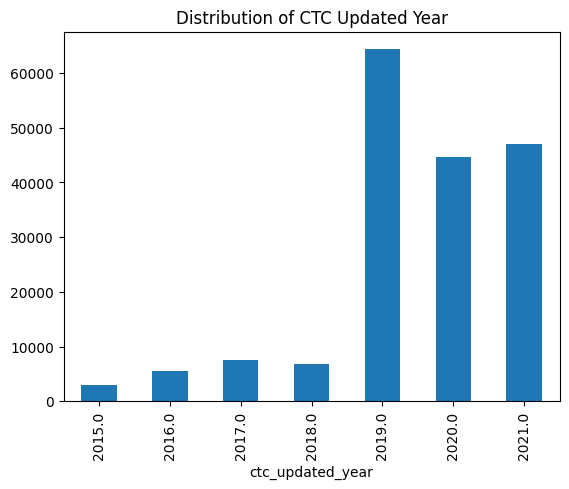

In [50]:
df_new['ctc_updated_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of CTC Updated Year')
plt.ylabel('')
plt.show()

<Axes: ylabel='proportion'>

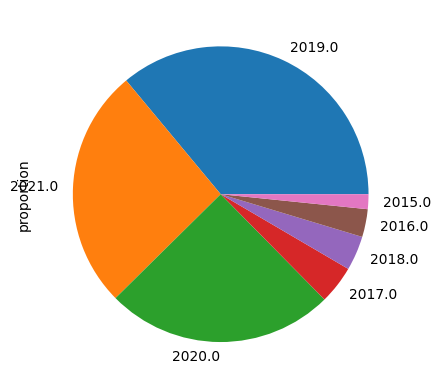

In [277]:
df_new['ctc_updated_year'].value_counts(normalize=True).plot(kind='pie')
plt.title('CTC updated years Distribution')
plt.ylabel('')
plt.show()

1. **Recent Data Dominates**: The majority of the entries are from recent years, with **2019** having the highest count at **64,350**, followed by **2021** (**47,091**) and **2020** (**44,619**). This suggests increased activity or better data recording in these years.  

2. **Steady Decline in Older Years**: Data decreases significantly in earlier years, with **2017** (7,461) and prior years having notably lower counts.  

3. **Low Representation for Older Years**: Years like **2015** and **2016** have minimal representation, indicating either fewer learners or incomplete historical data.  

4. **Focus on Recent Trends**: The data skew toward recent years can guide analysis to focus on the latest trends in CTC updates for actionable insights.  

5. **Potential Outliers**: The distribution suggests the need to ensure data from earlier years is complete and consistent for meaningful comparisons over time.

### *ORGYEAR*

In [51]:
df_new['orgyear'].value_counts()

,count
orgyear,
2018.0,21572
2016.0,20168
2017.0,20014
2019.0,19144
2015.0,18183
...,...
209.0,1
208.0,1
1981.0,1


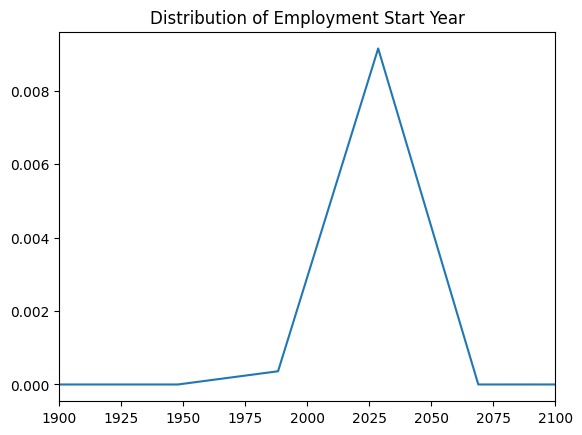

In [52]:
# @title *Detecting Outliers*
df_new['orgyear'].plot(kind='kde')
plt.xlim(1900,2100)
plt.title('Distribution of Employment Start Year')
plt.ylabel('')
plt.show()

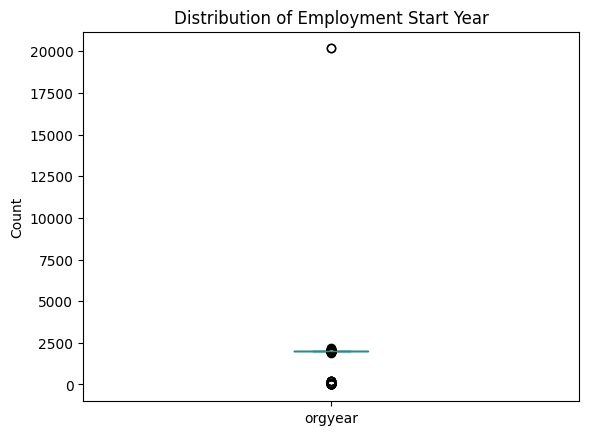

In [53]:
df_new['orgyear'].plot(kind='box')
plt.title('Distribution of Employment Start Year')
plt.ylabel('Count')
plt.show()

There are outliers in the orgyear column infact some values are pure data entry issues.
No person can work from 1900 to 2020 or after present dates data is also given, which must be treated.







In [85]:
# @title *Handling Outliers*
df_new['joining_year']=df_new['orgyear']
df_new.loc[(df_new['joining_year']>2021) |(df_new['joining_year']<1995),'joining_year']=np.nan

In [86]:
df_new.joining_year.isna().sum()

1599

In [87]:
# finding if we have orgyear for same learner in data
min_org_year=df_new.groupby('email_hash')['joining_year'].transform('min')
df_new['joining_year']=df_new['joining_year'].fillna(min_org_year)
df_new.isna().sum()

,0
company_hash,39
email_hash,0
orgyear,84
ctc,0
ctc_updated_year,0
job_category,0
joining_year,1529


Assuming the joining year as the mean value of orgyear for whom we dont have correct values.

In [90]:
min_org_year=df_new['joining_year'].mean()
df_new['joining_year']=df_new['joining_year'].fillna(min_org_year)
df_new.isna().sum()

,0
company_hash,39
email_hash,0
orgyear,84
ctc,0
ctc_updated_year,0
job_category,0
joining_year,0


- I am assuming the minimum joining year of a company is 1995 as 2021 is recent year and minimum is 2015 in data and a learner with such high experience(25-26) doesnt seems reasonable. Also there is incorrect entry in data, so clippping data to 1995.

In [93]:
df_new['joining_year'].value_counts()

,count
joining_year,
2018.0,21614
2016.0,20182
2017.0,20050
2019.0,19447
2015.0,18185
2014.0,14891
2020.0,11510
2013.0,11077
2012.0,9398


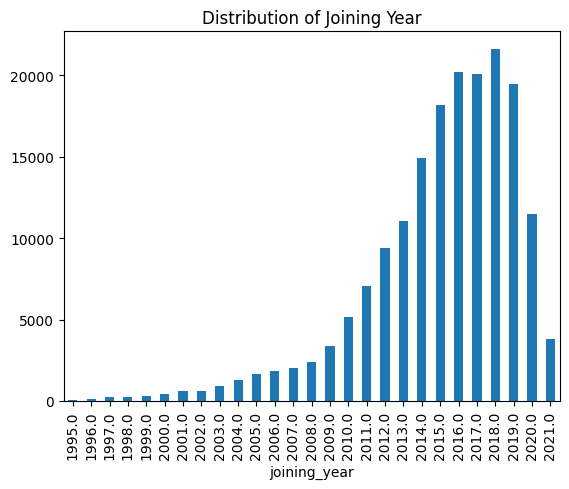

In [94]:
df_new['joining_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Joining Year')
plt.ylabel('Count of Learners')
plt.show()

<Axes: ylabel='joining_year'>

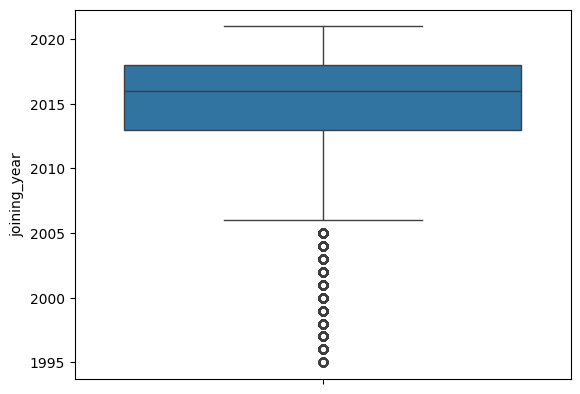

In [97]:
sns.boxplot(df_new['joining_year'])
plt.title('Distribution of Joining Year')
plt.ylabel('Count of Learners')
plt.show()

The lower bound years are still showing as outlier years, as per Boxplot Method.

1. **Peak Joining Years**: The majority of learners joined their companies in recent years, with **2018 (21,614)**, **2016 (20,182)**, and **2017 (20,050)** showing the highest counts. This indicates a trend of high hiring activity during these years.  

2. **Decline in Recent Years**: A noticeable drop is observed in **2020 (11,510)** and **2021 (3,829)**, likely due to the pandemic's impact on hiring trends.

3. **Steady Decline Over Time**: Joining counts consistently decrease as we go further back in time, reflecting the natural attrition of employees and fewer records of older joining years.

4. **Early 2000s Representation**: Learner counts drop sharply from **2001 (641)** to the late 1990s, indicating limited workforce longevity or incomplete data for earlier years.

5. **Pre-2000 Minimal Data**: Very few learners joined before **2000**, with counts like **454 (2000)** and **310 (1999)**, likely representing only senior employees or data constraints.
<br><br>
### *CTC*

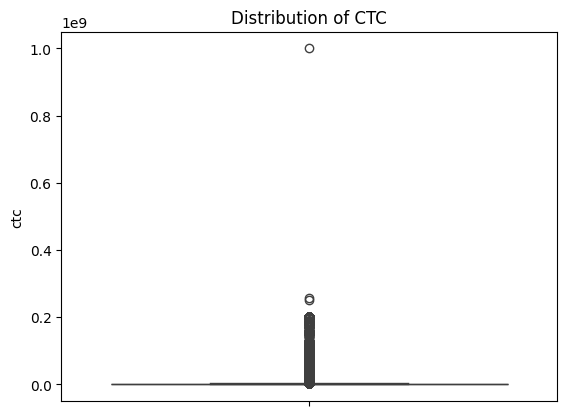

In [98]:
sns.boxplot(df_new['ctc'])
plt.title('Distribution of CTC in Billions')
plt.show()

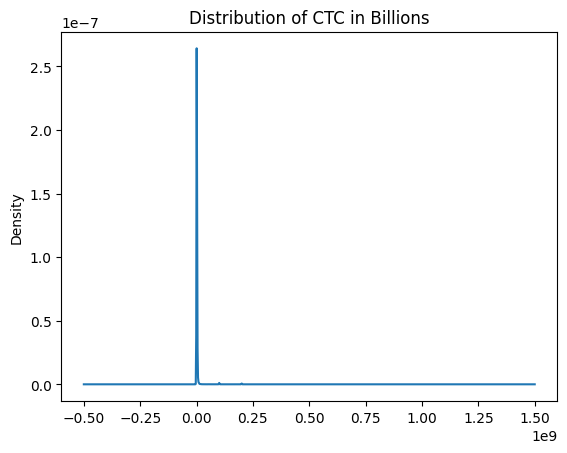

In [99]:
df_new['ctc'].plot(kind='kde')
plt.title('Distribution of CTC in Billions')
plt.show()

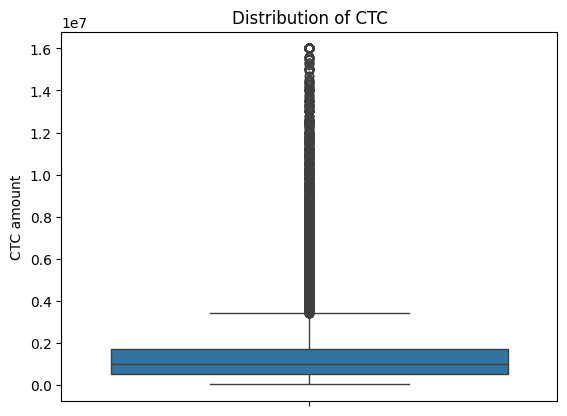

In [122]:
# @title *Treating Outliers*
df_new['ctc']=np.clip(df_new['ctc'],np.quantile(df_new['ctc'],0.01),np.quantile(df_new['ctc'],0.99))

sns.boxplot(df_new['ctc'])
plt.title('Distribution of CTC')
plt.ylabel('CTC amount')
plt.show()

- Outliers are still there but much better than before distribution.
- Learners with less than 2 Lakhs of many are the most in the Scaler.
- while there are lesser number for learners having ctc of

In [121]:
pd.cut(df['ctc'],bins=[0,200000,400000,600000,800000,1000000,2000000,100000000,200000000]).value_counts()

,count
ctc,
"(1000000, 2000000]",49727
"(2000000, 100000000]",33025
"(400000, 600000]",24156
"(600000, 800000]",23479
"(800000, 1000000]",18959
"(200000, 400000]",18782
"(0, 200000]",10247
"(100000000, 200000000]",610


1. **High-Earning Professionals**: The **₹10,00,000–₹20,00,000** bracket has the highest count (**49,727**), showing a significant proportion of learners in mid-to-senior level positions.

2. **Top Tier Earners**: Learners in the **₹20,00,000–₹1,00,000,000** bracket total **33,025**, indicating a considerable number of high-income professionals.

3. **Entry-Level Representation**: The lower brackets, such as **₹0–₹2,00,000** (**10,247**) and **₹2,00,000–₹4,00,000** (**18,782**), represent entry-level professionals or individuals at the start of their careers.

4. **Mid-Range CTC Dominates**: The majority of learners fall within the **₹4,00,000–₹6,00,000** range (**24,156**), followed closely by the **₹6,00,000–₹8,00,000** range (**23,479**). This suggests a strong representation of early to mid-level professionals and an opportunity to cater to professionals looking to upskill for career advancement into higher-paying roles. .  

5. **Higher CTC Learners Decrease**: The count drops significantly for the **₹8,00,000–₹10,00,000** range (**18,959**), indicating fewer learners in higher salary brackets.  

6. **Ultra-High CTC Learners**: The presence of **610** learners earning more than **₹10 crore** is notable, showcasing the reach of the platform among top-tier professionals or C-suite executives.

<br><br>
### *Data Validation*

In [123]:
df_new[df_new['ctc_updated_year']<df_new['joining_year']]

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_category,joining_year,ctc_new
8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,2020.0,450000,2019.0,Unknown,2020.0,450000
17,puxn,26b502eb6439ac80bd618a6f7c2b1c640b84c1e64c472c...,2020.0,1400000,2019.0,Unknown,2020.0,1400000
40,rvqotz nghmqg,96b1eb6b3ba24764239d502e3e5d9353af9dbd20594534...,2021.0,2500000,2020.0,Non Technical Roles,2021.0,2500000
48,rgfto wgbuvzxto xzw,7ce201f4f032c2af65b5d11f549de91ea3e62920834e72...,2020.0,3010000,2019.0,Backend Engineer,2020.0,3010000
56,axztqg xzzgcvnxgz ucn rna,3a8a6f0924d0d337eb63d8f6c6b6a3608913b7e4c95353...,2020.0,700000,2019.0,Frontend Engineer,2020.0,700000
...,...,...,...,...,...,...,...,...
205786,wyvqstmtt,faa7431795fe5a112893353d47ceb114be2ebdc1f0dff1...,2020.0,2200000,2019.0,Unknown,2020.0,2200000
205795,qtrxvzwt lxg xzegwgbb rxbxnta,aab90adb3d4cdf6a3c2c7a106ce58ec53a706aa082bc11...,2017.0,700000,2016.0,Unknown,2017.0,700000
205796,zgn vuurxwvmrt,e5ef043e885543843a2ffc11e18ba1662194512592b442...,2021.0,16000000,2019.0,Unknown,2021.0,8700000
205801,zgn vuurxwvmrt,03dea5143d030be1e5040ac960f2eeb4f42e2f4882d182...,2019.0,1800000,2016.0,Unknown,2019.0,1800000


There are **7082** rows where ctc updated year is less than joining year. It doesnt makes sense as no person can get ctc before joining the organisation. So, cleaning that data.

In [126]:
df_new['ctc_updated_year'] = df_new.apply(lambda x: x['joining_year'] if x['ctc_updated_year'] <
                    x['joining_year'] else x['ctc_updated_year'], axis=1)

# <font color ='blue'> ***Feature Engineering***

In [131]:
df_new['experience_years']=df_new['ctc_updated_year']-df_new['joining_year']
df_new['experience_years'].value_counts().sort_index()

,count
experience_years,
0.0,21137
1.0,19560
2.0,23918
3.0,22757
4.0,20154
5.0,16703
6.0,12990
7.0,10113
8.0,7513


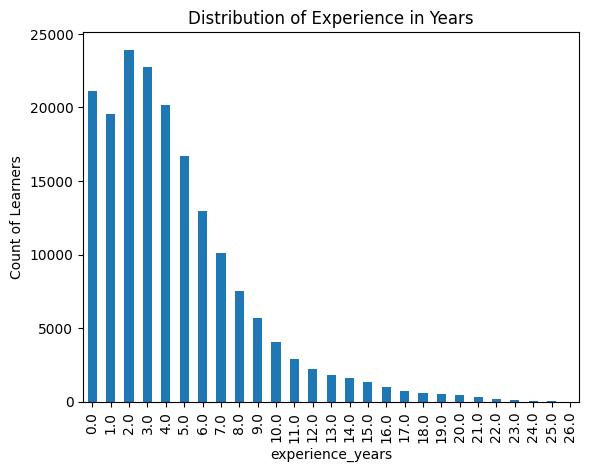

In [132]:
df_new['experience_years'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Experience in Years')
plt.ylabel('Count of Learners')
plt.show()


1. **Entry-Level Dominance**: A significant proportion of learners have **0–2 years of experience** (**64,615 combined**), indicating strong participation from fresh graduates or early-career professionals.

2. **Mid-Level Professionals**: The **3–6 years of experience** bracket accounts for **72,604 learners**, representing individuals likely looking to transition into mid-level roles or upscale their skills for growth.

3. **Steady Decline with Seniority**: Learner count progressively decreases as years of experience increase, showing fewer participants in senior-level roles.

4. **Experienced Learners**: There are **8,788 learners** with **10–15 years of experience**, indicating interest from seasoned professionals seeking specialization or career shifts.

5. **Niche Segment**: The **16+ years of experience** group is a smaller but significant cohort, with **4,118 learners**, often C-suite or leadership professionals aiming to update skills or mentor others.

In [140]:
df_new = df_new.sort_values(by=['email_hash', 'ctc_updated_year','ctc'])
df_new['promotion_status'] = df_new.groupby('email_hash')['ctc'].diff().gt(0).fillna(False).astype('int')
df_new

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_category,joining_year,ctc_new,experience_years,promotion_status
84638,bxwqgogen,00003288036a44374976948c327f246fdbdf0778546904...,2012.0,3500000,2019.0,Backend Engineer,2012.0,3500000,7.0,0
506,nqsn axsxnvr,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,2013.0,250000,2020.0,Backend Engineer,2013.0,250000,7.0,0
51568,gunhb,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,2021.0,1300000,2021.0,Product Development,2021.0,1300000,0.0,0
53844,bxwqgotbx wgqugqvnxgz,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,2004.0,2000000,2021.0,Product Development,2004.0,2000000,17.0,0
138229,fvrbvqn rvmo,00014d71a389170e668ba96ae8e1f9d991591acc899025...,2009.0,3400000,2018.0,Unknown,2009.0,3400000,9.0,0
...,...,...,...,...,...,...,...,...,...,...
39637,tqxwoogz ogenfvqt wvbuho,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,2004.0,3529999,2019.0,Quality Assurance and Testing,2004.0,3529999,15.0,0
185749,trnqvcg,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,2015.0,1600000,2018.0,Unknown,2015.0,1600000,3.0,0
148315,znn avnv srgmvr atrxctqj otqcxwto,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,2014.0,900000,2019.0,IT and Cyber Security,2014.0,900000,5.0,0
14106,zwq wgqugqvnxgz,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,2020.0,700000,2020.0,Product Development,2020.0,700000,0.0,0


In [143]:
df_new.groupby('email_hash')['promotion_status'].max().value_counts()

,count
promotion_status,
0,145641
1,7802


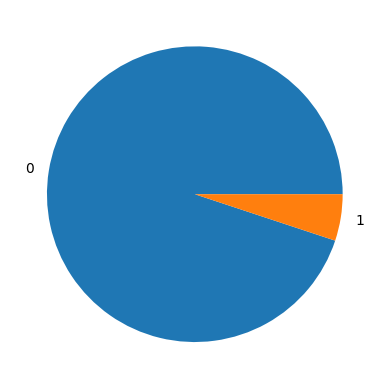

In [145]:
df_new.groupby('email_hash')['promotion_status'].max().value_counts(normalize=True).plot(kind='pie')
plt.ylabel('')
plt.show()

1. **Promotion Status**: The majority of learners, **145,641** (approximately **95.2%**), have a promotion status of **0**, indicating that they have not received a promotion within their current role or organization during their time with Scaler.

2. **Promoted Learners**: A smaller segment, **7,802** (around **4.8%**), has achieved a promotion (status **1**), suggesting that Scaler’s programs are effective for a portion of the learners in advancing their careers.


# <font color='blue'> *Bivariate Analysis*

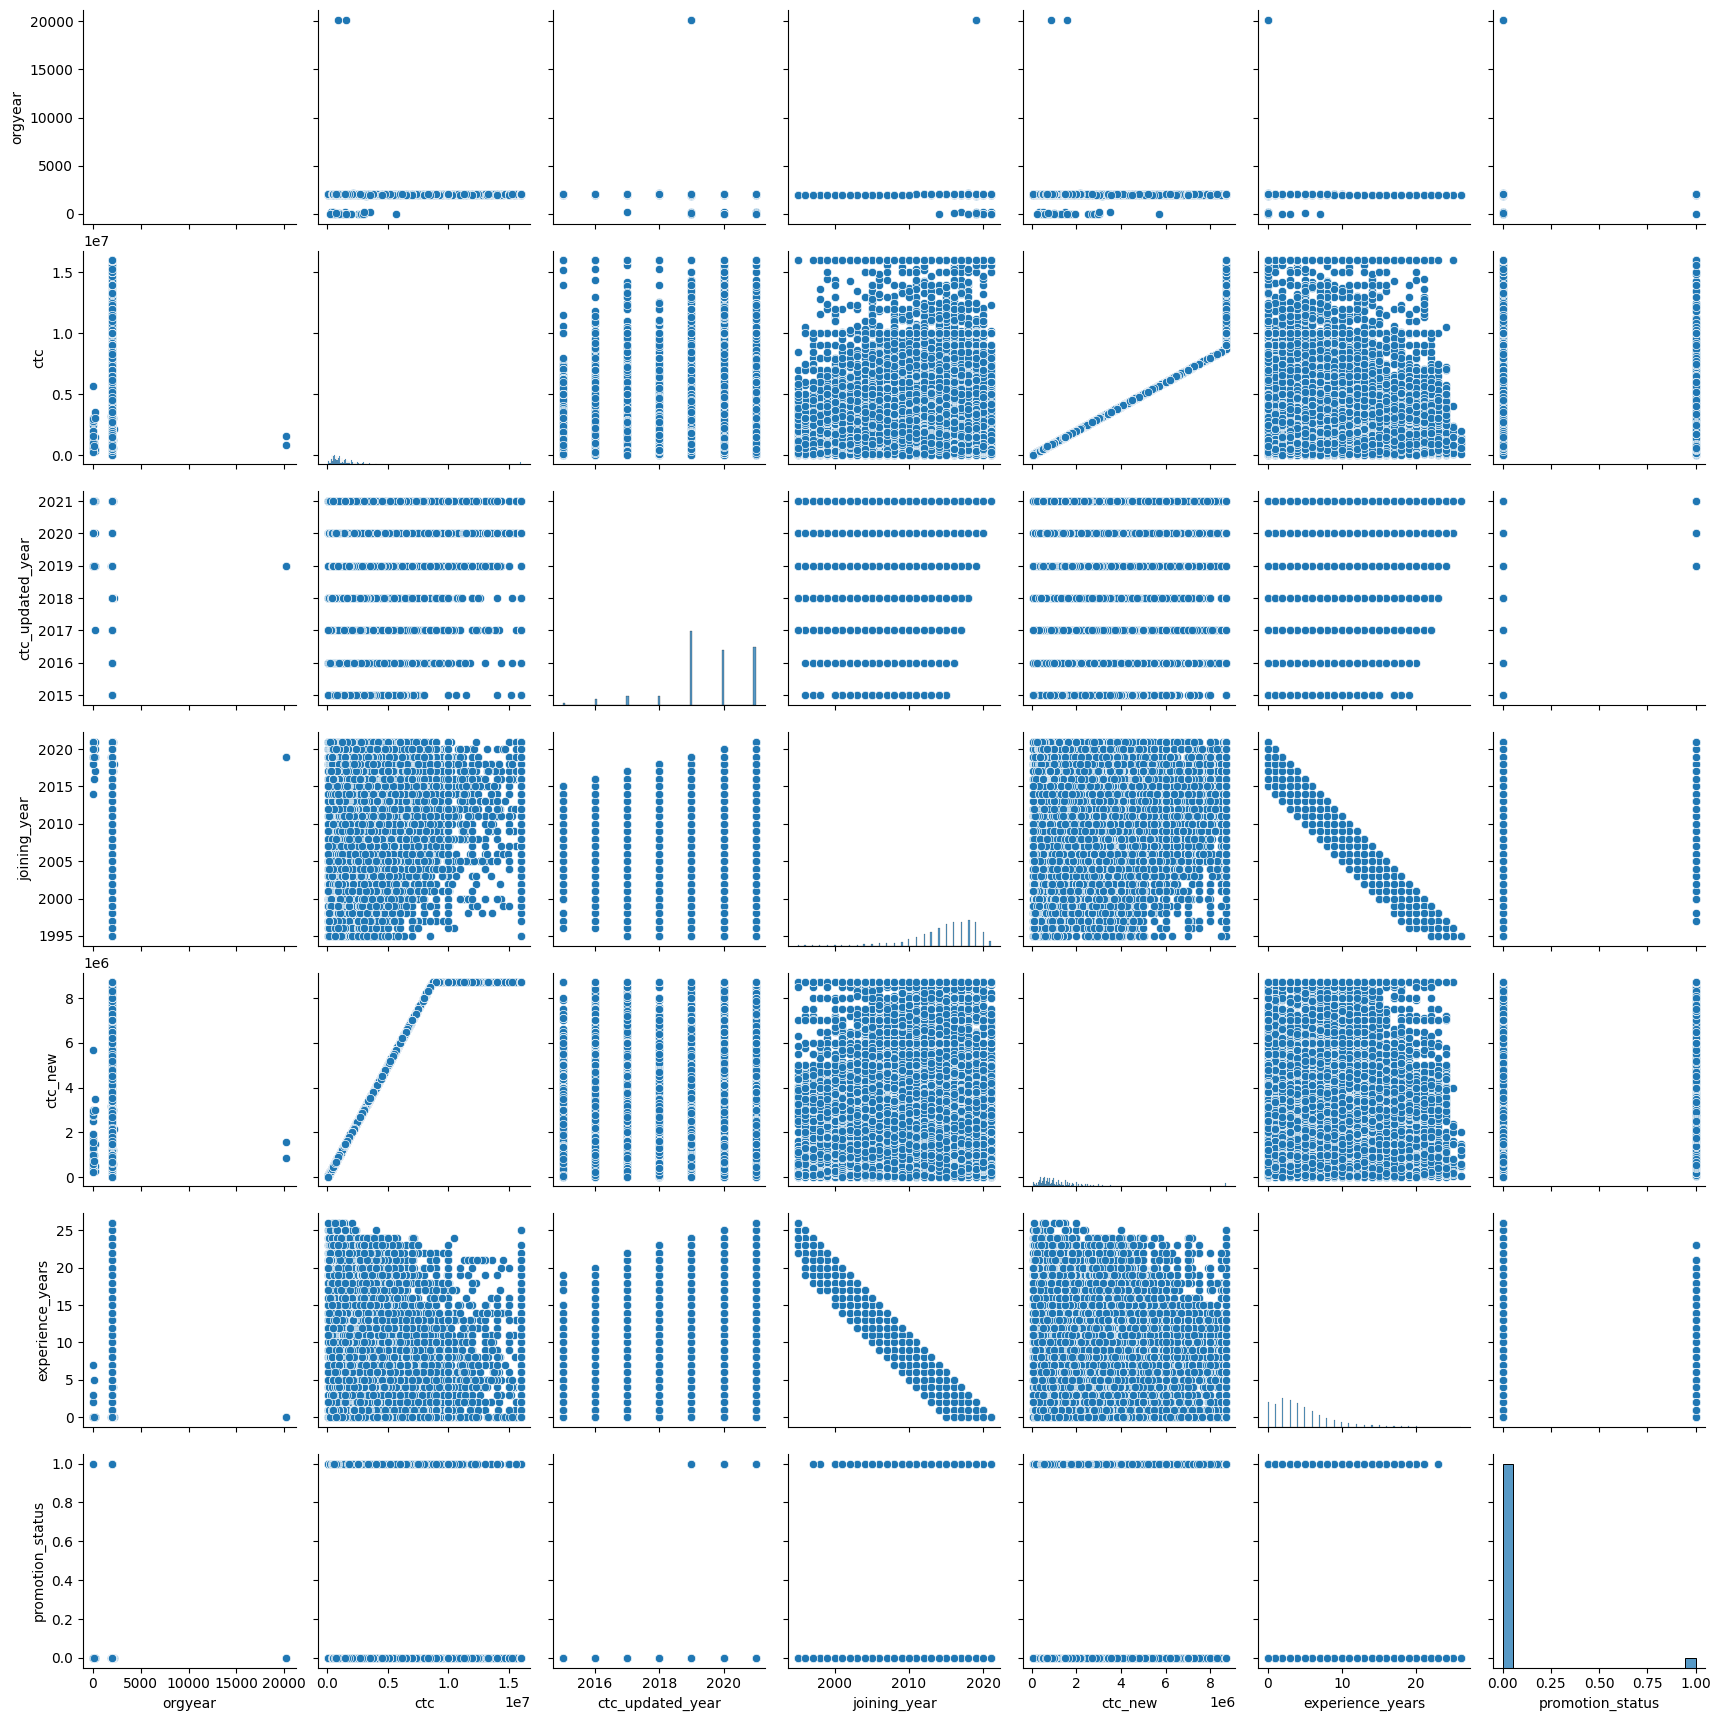

In [147]:
sns.pairplot(df_new)
plt.show()

In [148]:
df_new.to_csv('df_cleaned.csv')

# <FONT COLOR='BLUE'> *Statistical Summary*

In [141]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,178495.0,2.014762e+03,6.808224e+01,0.0,2013.0,2016.0,2018.0,20165.0
ctc,178579.0,1.485975e+06,1.961530e+06,35000.0,550000.0,990000.0,1700000.0,16000000.0
ctc_updated_year,178579.0,2.019550e+03,1.288805e+00,2015.0,2019.0,2020.0,2021.0,2021.0
joining_year,178579.0,2.015065e+03,4.114666e+00,1995.0,2013.0,2016.0,2018.0,2021.0
ctc_new,178579.0,1.401757e+06,1.431825e+06,35000.0,550000.0,990000.0,1700000.0,8700000.0
experience_years,178579.0,4.484637e+00,3.952311e+00,0.0,2.0,4.0,6.0,26.0
promotion_status,178579.0,4.368935e-02,2.044036e-01,0.0,0.0,0.0,0.0,1.0


In [142]:
df_new.describe(include='object').T

,count,unique,top,freq
company_hash,178540,37299,nvnv wgzohrnvzwj otqcxwto,6556
email_hash,178579,153443,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,9
job_category,178579,23,Backend Engineer,46728


In [ ]:
df_new.drop('orgyear',axis=1,inplace=True)

In [ ]:
df_cleaned=df_new.copy()

In [23]:
dff=df_new.copy().reset_index()
dff

,index,company_hash,email_hash,ctc,ctc_updated_year,job_category,joining_year,experience_years
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,2020.0,Non Technical Roles,2016.0,5.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,449999,2019.0,Product Development,2018.0,3.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,2020.0,Backend Engineer,2015.0,6.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,2019.0,Backend Engineer,2017.0,4.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,2019.0,Product Development,2017.0,4.0
...,...,...,...,...,...,...,...,...
178574,205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,220000,2019.0,Unknown,2008.0,13.0
178575,205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,500000,2020.0,Unknown,2017.0,4.0
178576,205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,700000,2021.0,Unknown,2021.0,0.0
178577,205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,5100000,2019.0,Unknown,2019.0,2.0


In [24]:
le=LabelEncoder()
dff['job_category_label']=le.fit_transform(dff['job_category'])
dff.drop(columns=['job_category'],inplace=True)
dff.head()

,index,company_hash,email_hash,ctc,ctc_updated_year,joining_year,experience_years,job_category_label,job_category_freq
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,2020.0,2016.0,5.0,13,19253
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,449999,2019.0,2018.0,3.0,15,28235
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,2020.0,2015.0,6.0,1,46728
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,2019.0,2017.0,4.0,1,46728
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,2019.0,2017.0,4.0,15,28235


In [25]:
pipe=Pipeline([('scaler', StandardScaler()), ('imputer', KNNImputer(n_neighbors=5))])
dff_knn=pd.DataFrame(pipe.fit_transform(dff.drop(columns=['email_hash','company_hash'])),columns=dff.columns.difference(['email_hash','company_hash']))

In [291]:
dff_knn.isna().sum()

,0
ctc,0
ctc_updated_year,0
experience_years,0
index,0
job_category_freq,0
job_category_label,0
joining_year,0


In [292]:
dff_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178579 entries, 0 to 178578
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ctc                 178579 non-null  float64
 1   ctc_updated_year    178579 non-null  float64
 2   experience_years    178579 non-null  float64
 3   index               178579 non-null  float64
 4   job_category_freq   178579 non-null  float64
 5   job_category_label  178579 non-null  float64
 6   joining_year        178579 non-null  float64
dtypes: float64(7)
memory usage: 9.5 MB


In [26]:
df_cleaned=pd.concat([dff_knn,dff[['email_hash','company_hash']]],axis=1)
df_cleaned[df_cleaned['company_hash'].isna()]

,ctc,ctc_updated_year,experience_years,index,job_category_freq,job_category_label,joining_year,email_hash,company_hash
1107,-1.712084,5.190420,0.373520,1.176595,-1.176595,-0.868684,-1.468349,8fe09b732fe2e5b66c14904fd02ff89fb54f458465ac1e...,NaN
2366,-1.690645,-0.173414,-0.373324,0.705131,-0.705131,0.361165,-0.281944,1074b55f02e6fc88596db85854e057c98cb53c038e0d7f...,NaN
3225,-1.676013,-0.153204,-0.373324,0.705131,-0.705131,0.361165,-0.281944,66263f4942b046c67ae6e2570e7825c03792631a0b13f1...,NaN
4123,-1.660530,-0.145119,0.373520,0.705131,-0.705131,-1.278634,1.462116,6eb55d779699a2ea94f340ab7a58c8ec505e38bbb41214...,NaN
4499,-1.654006,-0.169372,1.120364,1.176595,-1.176595,0.361165,-0.281944,18813fe2a50a45cc02c5b3871c676bd147c80ff0327ee9...,NaN
11290,-1.534598,-0.169372,1.120364,0.705131,-0.705131,1.591014,-0.161209,ea4f735b9357e8086a42bacc1f64b18e98c3dd1ad81f60...,NaN
13945,-1.484779,-0.064278,1.120364,-0.473526,0.473526,-1.278634,1.462116,b4a56d1199bc569aabd30cba8ea7a86fbddc85211453ba...,NaN
17315,-1.416140,-0.137035,1.120364,0.469400,-0.469400,0.634464,0.288216,07a60d6e853852471b0963b78a0a3074532572a2580864...,NaN
20706,-1.349520,-0.031941,0.373520,-1.180721,1.180721,1.591014,-0.161209,bdce6736cc1d55a909a46aed9e0bfdcd7cd523bfcf9b63...,NaN
27376,-1.205319,-0.175031,1.120364,0.705131,-0.705131,1.591014,-0.161209,8e70184e76f9a29078e8ddd928d24582e096f5b1a63197...,NaN


Though Knn imputation may be helping in imputating some **NAN** values but i already filled the job_position using mode job_position of respective and remaining with null and orgyear with mode of that learner orgyear. So to keep the data in original form rather than scaled. I am prefering the data to drop those 39 **company_hash** null data rows.

In [294]:
df_new.dropna(inplace=True)
df_new.isna().sum()

,0
company_hash,39
email_hash,0
ctc,0
ctc_updated_year,0
job_category,0
joining_year,0
experience_years,0


In [27]:
agg_fun={'ctc':'mean',
           'ctc_updated_year':'max',
           'experience_years':'max'}

df_grp=df_new.groupby(['email_hash','company_hash','job_category']).agg(agg_fun).reset_index()
df_grp

,email_hash,company_hash,job_category,ctc,ctc_updated_year,experience_years
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,Backend Engineer,3500000.0,2019.0,9.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,Backend Engineer,250000.0,2020.0,8.0
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,Product Development,1300000.0,2019.0,0.0
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,Product Development,2000000.0,2021.0,17.0
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,Unknown,3400000.0,2018.0,12.0
...,...,...,...,...,...,...
172272,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,tqxwoogz ogenfvqt wvbuho,Quality Assurance and Testing,3529999.0,2019.0,17.0
172273,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,trnqvcg,Unknown,1600000.0,2018.0,6.0
172274,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,znn avnv srgmvr atrxctqj otqcxwto,IT and Cyber Security,900000.0,2019.0,7.0
172275,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,zwq wgqugqvnxgz,Product Development,700000.0,2020.0,1.0


In [296]:
df_grp.nunique()

,0
email_hash,153411
company_hash,37299
job_category,23
ctc,3790
ctc_updated_year,7
experience_years,31


In [28]:
df_grp.groupby('email_hash')['company_hash'].nunique().value_counts()

,count
company_hash,
1,146550
2,6860
3,1


# Manual Clustering based on company, job position and years of experience

In [29]:
dict_comp=df_grp.groupby('company_hash')['email_hash'].nunique().to_dict()
df_grp['comp_emp']=df_grp['company_hash'].map(dict_comp)

In [30]:
# df_new['company_hash_clean']=df_new['company_hash'].mask(df_new['company_hash'].map(df_new['company_hash'].value_counts())<=5,'Small_companies')
df_grp['company_hash_clean']=df_grp['company_hash'].mask(df_grp['comp_emp']<=5,'Small companies')
df_grp['company_hash_clean'].value_counts()

,count
company_hash_clean,
Small companies,47623
nvnv wgzohrnvzwj otqcxwto,6128
xzegojo,4007
vbvkgz,2969
zgn vuurxwvmrt vwwghzn,2453
...,...
ho tzsxzttqxzs wgbuvzj,6
tzuyvot tztqsj,6
atrxctqj ytqg,6


In [31]:
df_cluster=df_grp.groupby(['company_hash_clean','job_category','experience_years'])['ctc'].describe()
df_cluster

count  \
company_hash_clean job_category                   experience_years          
1bs                Backend Engineer               2.0                 4.0   
                                                  3.0                 3.0   
                                                  4.0                 5.0   
                                                  5.0                 2.0   
                                                  6.0                 3.0   
...                                                                   ...   
zxztrtvuo          Product Development            4.0                 1.0   
                                                  5.0                 3.0   
                   Support & Maintenance Engineer 5.0                 1.0   
                   Unknown                        1.0                 7.0   
                                                  7.0                 1.0   

                                                                            mean  \
company_hash_clean job_category                   experience_years                 
1bs                Backend Engineer               2.0               1.093750e+06   
                                                  3.0               8.833333e+05   
                                                  4.0               1.222000e+06   
                                                  5.0               3.035000e+06   
                                                  6.0               2.243333e+06   
...                                                                          ...   
zxztrtvuo          Product Development            4.0               1.500000e+06   
                                                  5.0               8.993333e+05   
                   Support & Maintenance Engineer 5.0               1.200000e+06   
                   Unknown                        1.0               6.285714e+05   
                                                  7.0               1.275000e+06   

                                                                             std  \
company_hash_clean job_category                   experience_years                 
1bs                Backend Engineer               2.0               1.087332e+05   
                                                  3.0               1.258306e+05   
                                                  4.0               2.896895e+05   
                                                  5.0               1.011163e+06   
                                                  6.0               6.030202e+05   
...                                                                          ...   
zxztrtvuo          Product Development            4.0                        NaN   
                                                  5.0               3.131714e+05   
                   Support & Maintenance Engineer 5.0                        NaN   
                   Unknown                        1.0               2.176717e+05   
                                                  7.0                        NaN   

                                                                          min  \
company_hash_clean job_category                   experience_years              
1bs                Backend Engineer               2.0               1000000.0   
                                                  3.0                750000.0   
                                                  4.0                800000.0   
                                                  5.0               2320000.0   
                                                  6.0               1800000.0   
...                                                                       ...   
zxztrtvuo          Product Development            4.0               1500000.0   
                                                  5.0                575000.0   
                   Support & Maintenance Engineer 5.0               12

In [32]:
df_merged=df_grp.drop(columns=['company_hash','comp_emp']).merge(df_cluster,on=['company_hash_clean','job_category','experience_years'],how='left')

In [324]:
# pd.set_option('display.float_format', '{:.2f}'.format)
df_merged

,email_hash,job_category,ctc,ctc_updated_year,experience_years,company_hash_clean,count,mean,std,min,25%,50%,75%,max
0,00003288036a44374976948c327f246fdbdf0778546904...,Backend Engineer,3500000.00,2019.00,9.00,bxwqgogen,59.00,2930194.92,1715896.30,21000.00,2137500.00,2800000.00,3450000.00,8500000.00
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Backend Engineer,250000.00,2020.00,8.00,Small companies,611.00,2757233.62,11804200.18,2000.00,700000.00,1250000.00,1800000.00,200000000.00
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,Product Development,1300000.00,2019.00,0.00,gunhb,5.00,1228200.00,342594.80,710000.00,1100000.00,1300000.00,1431000.00,1600000.00
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,Product Development,2000000.00,2021.00,17.00,bxwqgotbx wgqugqvnxgz,1.00,2000000.00,NaN,2000000.00,2000000.00,2000000.00,2000000.00,2000000.00
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Unknown,3400000.00,2018.00,12.00,fvrbvqn rvmo,3.00,3766666.67,321455.03,3400000.00,3650000.00,3900000.00,3950000.00,4000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172272,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,Quality Assurance and Testing,3529999.00,2019.00,17.00,Small companies,13.00,3563615.23,5742674.46,100000.00,1230000.00,2700000.00,3300000.00,22200000.00
172273,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,Unknown,1600000.00,2018.00,6.00,Small companies,397.00,3786413.09,50385366.36,5000.00,480000.00,800000.00,1300000.00,1000150000.00
172274,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,IT and Cyber Security,900000.00,2019.00,7.00,znn avnv srgmvr atrxctqj otqcxwto,3.00,716666.67,160727.51,600000.00,625000.00,650000.00,775000.00,900000.00
172275,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,Product Development,700000.00,2020.00,1.00,zwq wgqugqvnxgz,8.00,880000.00,270026.45,700000.00,700000.00,750000.00,930000.00,1400000.00


### Creating Designation based on CTC

In [33]:
conditions=[df_merged['ctc']<df_merged['50%'],df_merged['ctc']<=df_merged['75%'],df_merged['ctc']>df_merged['75%']]
choices=[3,2,1]
df_merged['ctc_rank']=np.select(conditions,choices)
df_merged['ctc_rank'].value_counts()

,count
ctc_rank,
2,72712
3,62209
1,37356


In [34]:
df_merged['ctc_rank'].value_counts(normalize=True)*100

,proportion
ctc_rank,
2,42.206447
3,36.109870
1,21.683684


In [35]:
# Create flag for class at Company & Experience level
df_merged['Designation'] = df_merged.groupby(['company_hash_clean', 'experience_years'])['ctc_rank'].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_merged['Designation'].value_counts()


,count
Designation,
3,104730
2,57984
1,9563


In [36]:
# Create flag for class at Company  and job category level
df_merged['Class'] = df_merged.groupby(['company_hash_clean', 'job_category'])['ctc_rank'].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_merged['Class'].value_counts()

,count
Class,
3,108595
2,56901
1,6781


In [37]:
# create flag for company tier
df_merged['Tier'] = df_merged.groupby(['company_hash_clean'])['ctc_rank'].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_merged['Tier'].value_counts()

,count
Tier,
3,100165
2,71968
1,144


Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [38]:
tier_1=df_merged[df_merged['Tier']==1]
tier_1.sort_values(by='ctc',ascending=False).head(10)['email_hash']

,email_hash
47145,462f7e3dfe6c9ef8dab91e6c4650a83b6bcbe9c6b740ed...
73953,6e117d6929d02d1651967a365304b1d4645f0f03acb122...
37515,37904514845e8fe3f3576fc7b39baefb329f09374bb5c5...
132697,c549c0072f12b944351b5cc528d1503537b463690515ec...
103072,9940f19ff9fa4df05f5e5c29965d993bbe894501f4725e...
107949,a0873c00523e9d8676f941a6b5025a00ffcbd73347da88...
1199,01d83b3ba32f9a69ed26c974b9ded7b69b648e0da25c43...
149132,ddbea67db2038d34abeea6097e0b2b0d2fe32757a86077...
157125,e98b396e69f93078011e3d4fc85be086645adf35505b4c...
27888,293301f04ee39d4e4137ddc1a39c3651979c6006ff66d1...


Top 10 employees of data science in each company earning more than their peers - Class 1

In [39]:
top_ds=df_merged[(df_merged['job_category']=='Data Scientist') & df_merged['Class']==1].sort_values(by='ctc',ascending=False)
top_ds.groupby('company_hash_clean').apply(lambda x: x.nlargest(10, 'ctc')).reset_index(drop=True)

,email_hash,job_category,ctc,ctc_updated_year,experience_years,company_hash_clean,count,mean,std,min,25%,50%,75%,max,ctc_rank,Designation,Class,Tier
0,be8afd4a4e5cedb6bfbabbc88f15e756d69c3f2491d02a...,Data Scientist,200000000.0,2019.0,0.0,Small companies,33.0,1.323161e+07,4.121159e+07,4000.0,420000.0,900000.0,1800000.0,200000000.0,1,3,3,3
1,72ed7ced98573f71c8f95bc8b75aac4f0677e8872c6bec...,Data Scientist,199800000.0,2020.0,2.0,Small companies,157.0,2.274123e+06,1.589628e+07,7250.0,450000.0,780000.0,1200000.0,199800000.0,1,3,3,3
2,a1223067ab5c4ff7fcf39ed4c053057f06090a57fc05ba...,Data Scientist,127600000.0,2020.0,4.0,Small companies,284.0,1.384358e+06,7.543602e+06,4000.0,500000.0,800000.0,1300000.0,127600000.0,1,3,3,3
3,ee8dd42d6ea8365909147d861c7978d19f727a8075ba96...,Data Scientist,102500000.0,2020.0,1.0,Small companies,63.0,4.671667e+06,1.778391e+07,20000.0,455000.0,880000.0,1600000.0,102500000.0,1,3,3,3
4,2e1d492bc09bfe0d4cc9757a9c63a296c1527af1c8ecc8...,Data Scientist,100000000.0,2020.0,0.0,Small companies,33.0,1.323161e+07,4.121159e+07,4000.0,420000.0,900000.0,1800000.0,200000000.0,1,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,be6e6bf794d9866268d088286c44da89e0cc5acf517f0b...,Data Scientist,2000000.0,2021.0,1.0,zvz,8.0,1.466250e+06,7.252376e+05,530000.0,1075000.0,1400000.0,1775000.0,2800000.0,1,3,3,3
456,d91da6b12d1328efb8e5384372a6f86d6a3b69edb23b20...,Data Scientist,2000000.0,2021.0,6.0,zvz,3.0,1.135667e+06,9.571397e+05,107000.0,703500.0,1300000.0,1650000.0,2000000.0,1,3,3,3
457,69e06e73194a07ece2d03bc269d4c2eaf91c63fadc1f3a...,Data Scientist,1860000.0,2019.0,2.0,zvz,9.0,1.385556e+06,8.660414e+05,450000.0,700000.0,1500000.0,1800000.0,3200000.0,1,3,3,3
458,4ca2b1c72b9271f4c2732d3d0dada7d7556ad00d48d0b5...,Data Scientist,1800000.0,2021.0,0.0,zvz,11.0,1.097727e+06,8.366940e+05,300000.0,600000.0,800000.0,1350000.0,3000000.0,1,3,3,3


Bottom 10 employees of data science in each company earning less than their peers - Class 3<br>


In [345]:
bottom_ds=df_merged[(df_merged['job_category']=='Data Scientist') & df_merged['Class']==3].sort_values(by='ctc',ascending=True)
bottom_ds.groupby('company_hash_clean').apply(lambda x: x.nsmallest(10, 'ctc')).reset_index(drop=True)

,email_hash,job_category,ctc,ctc_updated_year,experience_years,company_hash_clean,count,mean,std,min,25%,50%,75%,max,ctc_rank,Designation,Class,Tier


Bottom 10 employees (earning less than most of the employees in the company)- Tier 3<br>


In [346]:
df_merged[df_merged['Tier']==3].sort_values(by='ctc',ascending=True).head(10)['email_hash']

,email_hash
124249,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...
78685,75357254a31f133e2d3870057922feddeba82b88056a07...
91065,8786759b95d673466e94f62f1b15e4f8c6bd7de6164074...
54469,512f761579fb116e215cabc9821c7f81153f0763e16018...
166892,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...
131864,c411a6917058b50f44d7c62751be9b232155b23211de4c...
160047,edcfb902656b736e1f35863298706d9d34ee795b7ed85a...
104203,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...
86477,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...
113149,a842673b5abebd7bf405bb7ad41560f6a2a586be2831c2...


Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X<br>

In [348]:
df_merged[(df_merged['experience_years']>=5)].groupby('company_hash_clean').apply(lambda x: x.nlargest(10, 'ctc')).reset_index(drop=True)

,email_hash,job_category,ctc,ctc_updated_year,experience_years,company_hash_clean,count,mean,std,min,25%,50%,75%,max,ctc_rank,Designation,Class,Tier
0,31db7b806a82aac024462d4c97e70eed918bf8c3193b7c...,Backend Engineer,3750000.00,2020.00,5.00,1bs,2.00,3035000.00,1011162.70,2320000.00,2677500.00,3035000.00,3392500.00,3750000.00,1,1,2,2
1,49c3e07a87bbf5f6e222a3b4844bbd9e64340a76f8c0c4...,Unknown,3400000.00,2019.00,15.00,1bs,1.00,3400000.00,NaN,3400000.00,3400000.00,3400000.00,3400000.00,3400000.00,2,2,2,2
2,eba7ff1100cfadb14ed1561978f736b0ba2dbb6268aff0...,Management,3400000.00,2019.00,15.00,1bs,1.00,3400000.00,NaN,3400000.00,3400000.00,3400000.00,3400000.00,3400000.00,2,2,2,2
3,350df9243c5c93a9b2a330e7e665c791d9dbe0c7e20209...,Unknown,3300000.00,2016.00,10.00,1bs,1.00,3300000.00,NaN,3300000.00,3300000.00,3300000.00,3300000.00,3300000.00,2,2,2,2
4,757e5f9a0fff2f3adf91cbd4b5453e64827913f6ce0faa...,Mobile Engineer,3000000.00,2021.00,8.00,1bs,1.00,3000000.00,NaN,3000000.00,3000000.00,3000000.00,3000000.00,3000000.00,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18592,4ebf56aec16de134303f4c54752d26bc12791e8b20b28b...,Frontend Engineer,2500000.00,2020.00,8.00,zxztrtvuo,2.00,2150000.00,494974.75,1800000.00,1975000.00,2150000.00,2325000.00,2500000.00,1,1,3,2
18593,66a9ddfbd95e2f5fb57e5f649bd22eeeb7c1a9aec920b8...,Frontend Engineer,2500000.00,2021.00,7.00,zxztrtvuo,2.00,2500000.00,0.00,2500000.00,2500000.00,2500000.00,2500000.00,2500000.00,2,2,3,2
18594,1cd0a52ed52dae24d605d9cdc8536499c10ce62bfb070f...,Data Scientist,2250000.00,2021.00,7.00,zxztrtvuo,1.00,2250000.00,NaN,2250000.00,2250000.00,2250000.00,2250000.00,2250000.00,2,2,2,2
18595,3385dc93ba44f4f1cc237ef4f8e057dab2f693d8961b64...,Frontend Engineer,1800000.00,2019.00,8.00,zxztrtvuo,2.00,2150000.00,494974.75,1800000.00,1975000.00,2150000.00,2325000.00,2500000.00,3,1,3,2



Top 10 companies (based on their CTC)<br>


In [353]:
df_merged.groupby('company_hash_clean')['ctc'].mean().sort_values(ascending=False).head(10)

,ctc
company_hash_clean,
xzaxvmhrro,62555000.00
ho tzsxzttqxzs wgbuvzj,50635000.00
psxor,39772875.00
nyt sqtvn wghqoto,34613333.33
xeewg ngpxg stztqvr xzohqvzwt,33976583.33
xqgz bghznvxz,33958333.33
x vb v eqtoytq,33954705.88
ntvwyxzs,33500000.00
ntvwy egq xzaxv,32327714.29


Top 2 positions in every company (based on their CTC)<br>

In [356]:
job_df=df_merged.groupby(['company_hash_clean','job_category'])['ctc'].mean().reset_index()
job_df.groupby('company_hash_clean').apply(lambda x: x.nlargest(2, 'ctc')).reset_index(drop=True)

,company_hash_clean,job_category,ctc
0,1bs,Management,2500000.00
1,1bs,Unknown,1850000.00
2,1bs ntwyzgrgsxto ucn rna,Backend Engineer,1504687.50
3,1bs ntwyzgrgsxto ucn rna,Product Development,1425000.00
4,20152019,Unknown,66895333.33
...,...,...,...
5131,zxyxrtzn ntwyzgrgsxto,Backend Engineer,1013333.33
5132,zxzlvwvqn,Management,2700000.00
5133,zxzlvwvqn,Unknown,2224000.00
5134,zxztrtvuo,IT and Cyber Security,2700000.00


# Unsupervised Clustering

In [80]:
# dff.to_csv('df_cleaned.csv')
dff=pd.read_csv('df_cleaned.csv')
dff.dropna(inplace=True)

In [81]:
dict_comp=dff.groupby('company_hash')['email_hash'].nunique().to_dict()
emp_count=dff['company_hash'].map(dict_comp)


dff['company_hash_freq']=emp_count.mask(emp_count<=5,5)

In [82]:
dff.head()

,Unnamed: 0,index,company_hash,email_hash,ctc,ctc_updated_year,joining_year,experience_years,job_category_label,job_category_freq,company_hash_freq
0,0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,1100000,2020.0,2016.0,5.0,13,19253,9
1,1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,449999,2019.0,2018.0,3.0,15,28235,349
2,2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2000000,2020.0,2015.0,6.0,1,46728,5
3,3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,700000,2019.0,2017.0,4.0,1,46728,55
4,4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,1400000,2019.0,2017.0,4.0,15,28235,5


In [83]:
df1=dff.drop(columns=['index','email_hash','ctc_updated_year','company_hash'])
df1

,Unnamed: 0,ctc,joining_year,experience_years,job_category_label,job_category_freq,company_hash_freq
0,0,1100000,2016.0,5.0,13,19253,9
1,1,449999,2018.0,3.0,15,28235,349
2,2,2000000,2015.0,6.0,1,46728,5
3,3,700000,2017.0,4.0,1,46728,55
4,4,1400000,2017.0,4.0,15,28235,5
...,...,...,...,...,...,...,...
178574,178574,220000,2008.0,13.0,22,21155,17
178575,178575,500000,2017.0,4.0,22,21155,94
178576,178576,700000,2021.0,0.0,22,21155,132
178577,178577,5100000,2019.0,2.0,22,21155,1069


In [84]:
scaled=StandardScaler()
df_scaled=pd.DataFrame(scaled.fit_transform(df1),columns=df1.columns)
df_scaled

,Unnamed: 0,ctc,joining_year,experience_years,job_category_label,job_category_freq,company_hash_freq
0,-1.732101,-0.104691,0.233715,-0.233715,0.361355,-0.281955,-0.505462
1,-1.732081,-0.157236,0.705166,-0.705166,0.634678,0.288172,-0.230313
2,-1.732062,-0.031936,-0.002011,0.002011,-1.278584,1.462005,-0.508700
3,-1.732042,-0.137027,0.469441,-0.469441,-1.278584,1.462005,-0.468236
4,-1.732023,-0.080439,0.469441,-0.469441,0.634678,0.288172,-0.508700
...,...,...,...,...,...,...,...
178535,1.731928,-0.175829,-1.652091,1.652091,1.591309,-0.161227,-0.498988
178536,1.731947,-0.153194,0.469441,-0.469441,1.591309,-0.161227,-0.436675
178537,1.731967,-0.137027,1.412344,-1.412344,1.591309,-0.161227,-0.405923
178538,1.731986,0.218665,0.940892,-0.940892,1.591309,-0.161227,0.352355


In [88]:
wcss=[]
silh_score
for k in range(2,11):
  kmean=KMeans(n_clusters=k,random_state=26)
  kmean.fit(df_scaled)
  sil_score=silhouette_score(df1,kmean.labels_)
  wcss.append(kmean.inertia_)
  silh_score.append(sil_score)
  print(f'Silhouette score for k={k} is {sil_score}')

Silhouette score for k=2 is 0.9864047668306625
Silhouette score for k=3 is 0.9837030741287105
Silhouette score for k=4 is 0.9837363860975205
Silhouette score for k=5 is 0.9689982503642163
Silhouette score for k=6 is 0.7465004298536911
Silhouette score for k=7 is 0.678822414199589
Silhouette score for k=8 is 0.6661140269246317
Silhouette score for k=9 is 0.6584277772237023
Silhouette score for k=10 is 0.6582873428747832


In [ ]:
max_silhouette_score = argmax(silh_score)
best_k = max_silhouette_score + 2  # Adjust for indexing

print("Best Silhouette Score:", silh_score[max_silhouette_score])
print("Recommended Number of Clusters (k):", best_k)

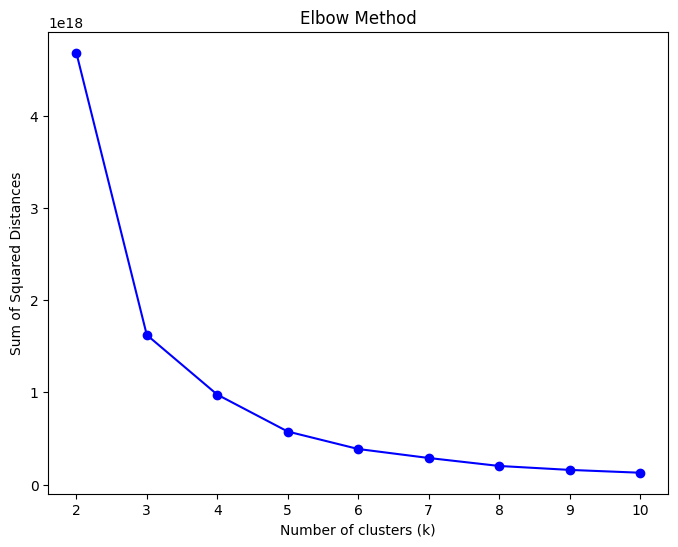

In [89]:
plt.subplot(1,2,1)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')

plt.subplot(1,2,2)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silh_score, 'bo-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.show()

In [111]:
kmeans=KMeans(n_clusters=3,random_state=26)
kmeans.fit(df_scaled)
df_scaled['label']=kmeans.labels_
df_scaled['label'].value_counts()

,count
label,
2,117092
0,41149
1,20299


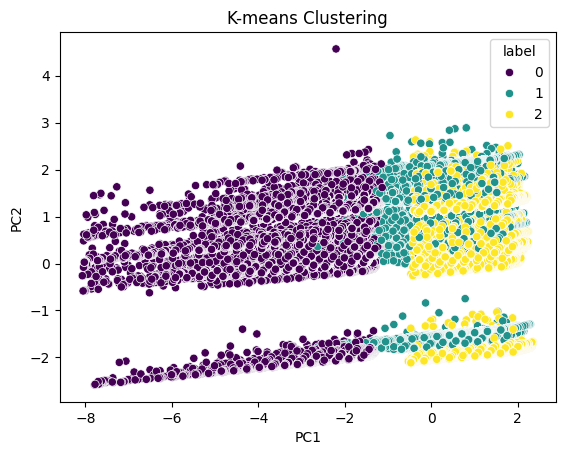

In [113]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_pca=pd.DataFrame(pca.fit_transform(df_scaled),columns=['PC1','PC2'])
df_pca['label']=df_scaled['label']

sns.scatterplot(df_pca,hue='label',x='PC1',y='PC2',palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [114]:
pca.explained_variance_ratio_.cumsum()

array([0.31935331, 0.51724986])

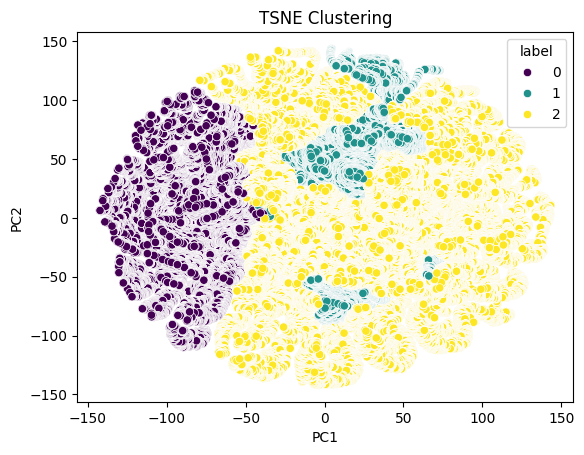

In [115]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=26)
df_tsne=pd.DataFrame(tsne.fit_transform(df_scaled),columns=['PC1','PC2'])
df_tsne['label']=df_scaled['label']

sns.scatterplot(df_tsne,hue='label',x='PC1',y='PC2',palette='viridis')
plt.title('TSNE Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [66]:
dff1=df_new.copy()
comp_count=dff1['company_hash'].map(dict_comp)
dff1['company_hash_freq']=comp_count.mask(comp_count<=5,5)

dff1=pd.get_dummies(dff1.reset_index(),columns=['job_category'],drop_first=True,dtype='int')

dff1.drop(columns=['index','email_hash','ctc_updated_year','company_hash'],inplace=True)
dff1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178579 entries, 0 to 178578
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   ctc                                           178579 non-null  int64  
 1   joining_year                                  178579 non-null  float64
 2   experience_years                              178579 non-null  float64
 3   company_hash_freq                             178540 non-null  float64
 4   job_category_Backend Engineer                 178579 non-null  int64  
 5   job_category_Data Engineer                    178579 non-null  int64  
 6   job_category_Data Scientist                   178579 non-null  int64  
 7   job_category_Database Administration          178579 non-null  int64  
 8   job_category_Fresher                          178579 non-null  int64  
 9   job_category_Frontend Engineer                17

In [116]:
scaled=StandardScaler()
df_scaled=pd.DataFrame(scaled.fit_transform(dff1),columns=dff1.columns)
df_scaled

,ctc,joining_year,experience_years,company_hash_freq,job_category_Backend Engineer,job_category_Data Engineer,job_category_Data Scientist,job_category_Database Administration,job_category_Fresher,job_category_Frontend Engineer,...,job_category_Non Technical Roles,job_category_Operations/Administrative Roles,job_category_Product Development,job_category_Quality Assurance and Testing,job_category_Research,job_category_Software,job_category_Support & Maintenance Engineer,job_category_Teaching,job_category_Top Officials,job_category_Unknown
0,-0.104699,0.233668,-0.233668,-0.505462,-0.595315,-0.012297,-0.177877,-0.056237,-0.014396,-0.252762,...,2.876697,-0.017711,-0.433362,-0.197482,-0.085965,-0.181711,-0.14899,-0.012067,-0.047023,-0.366582
1,-0.157246,0.705131,-0.705131,-0.230313,-0.595315,-0.012297,-0.177877,-0.056237,-0.014396,-0.252762,...,-0.347621,-0.017711,2.307540,-0.197482,-0.085965,-0.181711,-0.14899,-0.012067,-0.047023,-0.366582
2,-0.031941,-0.002063,0.002063,-0.508700,1.679783,-0.012297,-0.177877,-0.056237,-0.014396,-0.252762,...,-0.347621,-0.017711,-0.433362,-0.197482,-0.085965,-0.181711,-0.14899,-0.012067,-0.047023,-0.366582
3,-0.137035,0.469400,-0.469400,-0.468236,1.679783,-0.012297,-0.177877,-0.056237,-0.014396,-0.252762,...,-0.347621,-0.017711,-0.433362,-0.197482,-0.085965,-0.181711,-0.14899,-0.012067,-0.047023,-0.366582
4,-0.080446,0.469400,-0.469400,-0.508700,-0.595315,-0.012297,-0.177877,-0.056237,-0.014396,-0.252762,...,-0.347621,-0.017711,2.307540,-0.197482,-0.085965,-0.181711,-0.14899,-0.012067,-0.047023,-0.366582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178574,-0.175839,-1.652184,1.652184,-0.498988,-0.595315,-0.012297,-0.177877,-0.056237,-0.014396,-0.252762,...,-0.347621,-0.017711,-0.433362,-0.197482,-0.085965,-0.181711,-0.14899,-0.012067,-0.047023,2.727903
178575,-0.153204,0.469400,-0.469400,-0.436675,-0.595315,-0.012297,-0.177877,-0.056237,-0.014396,-0.252762,...,-0.347621,-0.017711,-0.433362,-0.197482,-0.085965,-0.181711,-0.14899,-0.012067,-0.047023,2.727903
178576,-0.137035,1.412326,-1.412326,-0.405923,-0.595315,-0.012297,-0.177877,-0.056237,-0.014396,-0.252762,...,-0.347621,-0.017711,-0.433362,-0.197482,-0.085965,-0.181711,-0.14899,-0.012067,-0.047023,2.727903
178577,0.218667,0.940863,-0.940863,0.352355,-0.595315,-0.012297,-0.177877,-0.056237,-0.014396,-0.252762,...,-0.347621,-0.017711,-0.433362,-0.197482,-0.085965,-0.181711,-0.14899,-0.012067,-0.047023,2.727903


In [ ]:
X=df_scaled.sample(fraction=0.10)

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=, affinity='euclidean', linkage='ward')
X['label']=model.fit_predict(X)

In [ ]:
from sklearn.cluster import AgglomerativeClustering


Checking clustering tendency<br>

Hierarchical clustering (you can do this on a sample of the dataset if your process is taking time)<br>
Insights from Unsupervised Clustering<br>
Provide actionable Insights & Recommendations for the Business.<br>
<br>
Evaluation Criteria (100 Points):
<br>
Derform Exploratory Data Analysis (10 points)<br>

Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)<br>
Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.<br>

Illustrate the insights based on EDA<br>
Comments on range of attributes, outliers of various attributes<br>
Comments on the distribution of the variables and relationship between them<br>
Comments for each univariate and bivariate plots<br><br>

Unsupervised learning: (20 Points)<br>
Checking clustering tendency,
Hierarchical Clustering<br><br>
Actionable Insights & Recommendations (10 Points)<br>

**Insights**
Data Preprocessing:

The dataset contained 205,843 rows with features like hashed company name, joining date, promotion year, and post-promotion salary updates.
Missing values in the job_position column were imputed using a kNN imputer. Rows with missing values in company_hash (indicating missing company names) were dropped.
A new feature, "Years of Experience" (YOE), was created by calculating the difference between the employee's last promotion year and joining year.
Rows with negative YOE values (impossible scenarios) were removed.
Feature Engineering for Business Logic Clustering:

Three new categorical features were created:
Company_tier: Groups companies based on name, enabling compensation comparisons across job positions within the same company.
Company_job_tier: Groups by company name and job position, allowing compensation comparisons for the same job position across peers.
Company_job_yoe_tier: Groups by company name, job position, and YOE, highlighting the importance of YOE for compensation within a specific job role.
Univariate Analysis:

Inconsistency was identified in job position titles (e.g., "Software Engineer 1" and "SDE 1" representing the same role). These inconsistencies were standardized.
The dataset included entries from 32,626 unique companies with 452 distinct job positions.
The employee salary distribution, visualized through a histogram, ranged from 3 to 10 lacs per annum.
Bivariate Analysis (Heatmap):

A heatmap revealed a positive correlation between YOE, company tier, company_job_tier, and company_job_yoe_tier with CTC (salary), as expected.
The heatmap also confirmed a negative correlation between year of joining and CTC, a commonly observed trend.
Business Logic Clustering:

Clustering aimed to identify employee segments based on compensation within their company context. Here's the breakdown of the defined tiers:

Tier 1: Top 10 highest-earning employees within each company.
Class 1: Top 10 data science professionals in companies like Amazon or TCS, earning more than their peers.
Class 3: Bottom 10 data science professionals in companies like Amazon or TCS, earning less than their peers.
Tier 3: Bottom 10 lowest-earning employees within each company.
Tier X: Top 10 employees in a specific department within Amazon with 5/6/7 years of experience, earning more than their peers.
Additional Clustering Analyses:

Top 10 companies were identified based on their average CTC.
The top 2 positions (based on CTC) were identified within each company.

Unsupervised Clustering Tendency:

Hopkins test was conducted to assess data clusterability, resulting in a score of 0.89, indicating strong potential for clustering.

Feature Encoding:

Label encoding was applied to categorical features like company_hash and job_position.
Ordinal encoding was used for tier-related features (Company_tier, etc.) due to the inherent order within these categories.

K-Means and Hierarchical Clustering:

The elbow method suggested an optimal number of 2 clusters for K-means clustering, while the Silhouette method indicated 3 clusters.
Hierarchical clustering, performed on a sample of the data, suggested 4 optimal clusters.

Rationale for Choosing 3 Clusters:

The decision to focus on 3 clusters aligns with the pre-defined employee tiers used for business logic clustering.

**Recommendations:**

Data Quality Emphasis:

Data inconsistencies should be addressed before analysis to ensure reliable results.
Personalized Career Growth Insights:

By considering multiple parameters together (company, YOE, position), more accurate recommendations for career growth can be provided. For example, comparing an employee's compensation to peers within the same company can indicate potential growth opportunities.

YOE and Compensation:

The analysis revealed a positive correlation between YOE and compensation, with managerial positions offering the highest salaries.

Inter-Company Mobility:

The data suggests that employees with higher YOE in lower-tier companies might earn less than those with less experience in higher-tier companies. This highlights the potential benefits of switching companies for career advancement.
High-Earning Job Titles:

The dataset identified frontend/backend developers and data scientists as professions with generally higher salaries.

Employee Career Guidance Framework:

Internal Growth Potential: Analyze the employee's compensation compared to peers within the same company.
Upskilling for Higher Positions: If internal growth potential exists, identify positions with higher compensation for the

1. What percentage of users fall into the largest cluster?

Ans : Percentage in Largest Cluster:
The observations don't directly provide the size of the largest cluster. The report mentions K-means and Hierarchical clustering suggesting 2, 3, and 4 clusters, respectively. Without knowing the chosen method or specific cluster sizes, we can't determine the percentage in the largest cluster.

2. Comment on the characteristics that differentiate the primary clusters from each other.

Ans Characteristics of Primary Clusters:
Unfortunately, the observations lack details about the specific characteristics differentiating the clusters. However, based on the context of business logic clustering, we can infer some possibilities:

Cluster 1 (Tier 1): Top earners within each company (likely senior or managerial positions with high YOE).
Cluster 2 (Class 1 & Tier X): High-performing data scientists in specific companies (Amazon, TCS) and top earners in a specific Amazon department with 5-7 years of experience (potentially high-demand roles).
Cluster 3 (Class 3 & Tier 3): Lower-earning data scientists and bottom earners within each company (possibly newer hires or less experienced professionals).

3. Is it always true that with an increase in years of experience, the CTC increases?
Provide a case where this isn't true.

Ans. YOE and CTC Increase:
The observations suggest a positive correlation between YOE and CTC, with managerial positions having the highest salaries. However, this isn't always true. Here's a counter-example:

An employee with high YOE in a lower-tier company might earn less than someone with less experience in a higher-tier company. This case highlights the impact of company tier on compensation besides YOE.

4. Name a job position that is commonly considered entry-level but has a few
learners with unusually high CTCs in the dataset.

Ans.High CTC Entry-Level Job:
The observations don't mention specific job titles, but frontend/backend developers and data scientists are identified as generally high-paying professions. These roles can be entry-level, but some individuals with exceptional skills or experience might command higher salaries even at the entry level.

5. What is the average CTC of learners across different job positions?

Ans.Average CTC by Job Position:
The observations don't directly provide the average CTC for each job position. However, the report mentions the possibility of analyzing this using the available data.

6. For a given company, how does the average CTC of a Data Scientist compare
with other roles?

Ans. Data Scientist CTC vs. Other Roles:
For a given company, you can compare the average CTC of data scientists with other roles using the dataset. The observations suggest data scientists might be among the higher-paid roles, but the exact comparison depends on the specific company and other positions available.

7. Discuss the distribution of learners based on the Tier flag:
  1. Which companies dominate in Tier 1 and why might this be the case?
  2. Are there any notable patterns or insights when comparing learners from
  Tier 3 across different companies?

Ans. Tier Flag Distribution:
i) Tier 1 Companies:

The observations don't reveal the dominant companies in Tier 1. However, it's likely that these companies are:

* Well-established and financially strong.
* Offer competitive salaries and attract top talent.
* Have positions with high growth potential.
ii) Tier 3 Learners:

The observations don't mention specific insights for Tier 3 learners across companies. However, you could analyze the data to see if there are patterns like:
* A higher concentration of freshers or lower YOE individuals.
* Specific companies with a larger proportion of Tier 3 learners, potentially indicating lower average compensation within those companies.

8. After performing unsupervised clustering:
  1. How many clusters have been identified using the Elbow method?
  2. Do the clusters formed align or differ significantly from the manual
  clustering efforts? If so, in what way?

Ans. Unsupervised Clustering:
i) Number of Clusters:

The elbow method suggests 2 clusters, while the Silhouette method suggests 3.

ii) Comparison with Manual Clustering:

The chosen clustering method (K-means with 2 or 3 clusters) might not perfectly align with the manual clustering of 3 tiers (Tier 1, Class 1/3, Tier 3). It's possible that the unsupervised clustering doesn't fully capture the nuances of the business logic used for manual clustering.


9. From the Hierarchical Clustering results:
  1. Are there any clear hierarchies or patterns formed that could suggest the
  different levels of seniority or roles within a company?
  2. How does the dendrogram representation correlate with the 'Years of
  Experience' feature?

Ans. Hierarchical Clustering:
i) Hierarchies and Seniority:

The observations don't provide details about clear hierarchies in the dendrogram. However, analyzing the dendrogram branches might reveal groups of learners with similar characteristics (potentially related to seniority or roles).

ii) Dendrogram and YOE:

The dendrogram might show some correlation with the "Years of Experience" feature. Learners with similar YOE might cluster together, but this wouldn't be the only factor influencing cluster formation. Other features like job position and company tier could also play a role.




5. **Potential for Partnerships**: Companies with high learner counts are strong candidates for targeted partnerships, as they show significant engagement with Scaler’s programs.

6. **Actionable Insight**: Understanding the specific needs and job roles of learners from these companies could help tailor Scaler’s offerings for maximum impact.

6. **Actionable Insight**: Recent joining years highlight the need to focus on upskilling mid-level professionals, while data from earlier years may guide senior-level leadership training programs.

5. **Tailored Offerings**: A focus on creating specialized programs for learners in the lower brackets (₹0–₹4,00,000) could help them transition into mid-level roles, while advanced skill training could target those in the upper brackets.

7. **Upskilling Focus**: Customized offerings for both mid-level professionals and top earners could help learners in the ₹10–₹20 lakh range progress to higher brackets, while entry-level learners can be guided to mid-level roles.

6. **Targeted Offerings Needed**: The dominance of early and mid-level learners suggests tailoring courses for beginners and intermediates, while providing advanced leadership and niche skill programs for experienced professionals.

3. **Focus on Career Growth**: The data reveals that while most learners are still in their current roles, there is an opportunity for Scaler to tailor content or mentorship programs aimed at furthering career advancement and helping more learners achieve promotions.

4. **Impact of Courses**: The relatively small proportion of promoted learners could highlight the need for more targeted strategies and programs that enhance job performance, skills relevant to career advancement, or strategies that guide learners through the promotion process.